# Install Requirements

In [33]:
%pip install pandas matplotlib


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [34]:
import pandas as pd

# Load Data

In [35]:
from pathlib import Path

REPOSITORY_PATH = Path().absolute().parent
DATA_DIR = REPOSITORY_PATH / Path("data")

assert DATA_DIR.is_dir()

## Load Sources DB

In [120]:
prefixes = ["https://", "http://", "www.", '"']
suffixes = ["/", '"']


def strip_url(url: str) -> str:
    for prefix in sorted(prefixes):
        if url.startswith(prefix):
            url = url[len(prefix) :]
    for suffix in sorted(suffixes):
        if url.endswith(suffix):
            url = url[: -len(suffix)]
    return url.strip()


urls = [
    "http://muurmooi.nl/",
    "museumpassmusees.be",
    '"wikipedia.org "',
    "http://www.fonq.nl",
]
expecteds = ["muurmooi.nl", "museumpassmusees.be", "wikipedia.org", "fonq.nl"]

for url, expected in zip(urls, expecteds):
    stripped = strip_url(url)
    assert stripped == expected, f"Got: {stripped}\tExpected: {expected}"

In [121]:
BRONNEN_DB_DIR = DATA_DIR / Path(
    "ffdb4d71-abb2-44a1-a0b0-f0544d8dacdc_Export-fce68157-ea1d-4e93-b29d-ea26fb67c0fa"
)
assert BRONNEN_DB_DIR.is_dir()

BRONNEN_FILE = BRONNEN_DB_DIR / Path(
    "Bronnen DB ebb1bca364c64cfebc8109b4fc3951eb_all.csv"
)
assert BRONNEN_FILE.is_file()

In [122]:
sources = (
    pd.read_csv(
        BRONNEN_FILE,
        keep_default_na=True,
        dtype={"uBlocked trackers": "Int64"},
        converters={"Name": strip_url},
    )
    .dropna(subset=["Name", "NR"])
    .set_index("Name", verify_integrity=True)
)
sources.head()

,URL Domein,Onderwerpen,Sector,Reclame,uBlocked trackers,Commercialiteit,Conclusie over doel vd bron,Vrije labels bron/onderwerp,Thumbs up 8-14?,Status,...,Extra URL,Created time,Created by,URL Moederbedrijf,SlimZ Resultaten DB,Resultaten: toegankelijkheid,Cookie info page,More examples,Toegankelijkheidspagina,Related to Resultaten DB 01 (1) (Bronnen DB)
Name,,,,,,,,,,,,,,,,,,,,,
24baby.nl,https://www.24baby.nl/,NaN,Winkels en bedrijven div,over_the_top_ads,5,commercieel,"commercieel informatieproduct, reclamevehikel","nieuws, promotioneel, reclamevehikel, webshop,...",Just-in-case,Done,...,NaN,"November 6, 2023 11:09 AM",Maarten Sprenger,NaN,NaN,"redelijk begrijpelijk,eenvoudig,redelijk begri...",https://24baby.app/privacybeleid,NaN,-,NaN
24kitchen.nl,https://www.24kitchen.nl,NaN,Entertainment-industrie,"company_promotion, limited_ads, sluikreclame",17,commercieel,"commercieel informatieproduct, entertainment","entertainment, infotainment, promotioneel",Just-in-case,Done,...,NaN,"December 14, 2023 6:43 PM",Maarten Sprenger,https://privacy.thewaltdisneycompany.com/nl/de...,NaN,redelijk begrijpelijk,https://privacy.thewaltdisneycompany.com/nl/pr...,NaN,-,NaN
333travel.nl,https://www.333travel.nl/,NaN,Reisorganisaties,company_promotion,7,commercieel,"informatie in kader van verkoop/bezoek, websh...","bedrijfsinfo/uithangbord, productinformatie, p...",Just-in-case,Done,...,NaN,"February 23, 2024 5:35 PM",Maarten Sprenger,NaN,NaN,nvt,https://www.333travel.nl/cookies,NaN,NaN,NaN
absolutefacts.nl,https://www.absolutefacts.nl/,geschiedenis,Internetbedrijven,company_promotion,2,educatief_commercieel,commercieel informatieproduct,"informatie_primair_doel, webshop",Twijfel,Done,...,NaN,"December 14, 2023 7:29 PM",Maarten Sprenger,https://www.absolutefigures.nl/,NaN,redelijk begrijpelijk,https://www.absolutefacts.nl/uw-privacy.htm,NaN,-,NaN
accuautoshop.nl,https://www.accuautoshop.nl/,NaN,Winkels en bedrijven div,company_promotion,6,commercieel,webshop/winkel (+productinfo),webshop,Nee,Done,...,NaN,"February 22, 2024 3:23 PM",Maarten Sprenger,NaN,NaN,"nvt,nvt",NaN,NaN,NaN,NaN


In [123]:
sources.columns

Index(['URL Domein', 'Onderwerpen', 'Sector', 'Reclame', 'uBlocked trackers',
       'Commercialiteit', 'Conclusie over doel vd bron',
       'Vrije labels bron/onderwerp', 'Thumbs up 8-14?', 'Status',
       'About page', ' Notes', 'Kwaliteit_about', 'Instelling/Bedrijf/Persoon',
       'Resultaten: vrije labels', 'Moederbedrijf DB', 'NR', 'Resultaten DB',
       'Extra URL', 'Created time', 'Created by', 'URL Moederbedrijf',
       'SlimZ Resultaten DB', 'Resultaten: toegankelijkheid',
       'Cookie info page', 'More examples', 'Toegankelijkheidspagina',
       'Related to Resultaten DB 01 (1) (Bronnen DB)'],
      dtype='object')

In [124]:
len(sources)

543

## Load Query DB

In [125]:
QUERY_DIR = DATA_DIR / Path(
    "b1e0c36a-e9d4-49b1-8b6b-2363200e535b_Export-6745f4f4-da35-4e86-9305-61aebe65f565/Query DB 01 5a4aec0449af4acc87a45c19be574353"
)
assert QUERY_DIR.is_dir()

QUERY_FILE = QUERY_DIR / Path("Untitled cacf3a0313a84561bac9b6ea48ecc189_all.csv")
assert QUERY_FILE.is_file()

In [126]:
all_queries = pd.read_csv(QUERY_FILE)

queries = (
    all_queries[all_queries["OK-100"] == "Yes"]
    .drop(["Created time"], axis=1)
    .astype({"Query": pd.StringDtype()})
)
queries.head()

,Query,Onderwerp,Soort Query (select),Leeftijd,Extra (multi),Kennisvenster?,'Samenvatting'?,Extra (top-down),Google,Video Facet,Videos-Schooltv?,Opmerkingen,OK-100,Add Results,Resultaten DB,Date,Bronnen DB,Ranking Conclusie
0,leven,Natuur/Biologie,Named entity,8,Media(ster),Nee,Nee,"Gerelateerde zoekopdrachten (na 10), Meer om t...",https://www.google.com/search?q=leven&rlz=1C5C...,https://www.google.com/search?sca_esv=60037616...,-,NaN,Yes,Done,NaN,NaN,NaN,NaN
1,wat betekent schotse,Taal/Cultuur,Vragen,10,NaN,Nee,Ja,Vragen van anderen (top),https://www.google.com/search?q=wat+betekent+s...,https://www.google.com/search?sca_esv=60037616...,-,NaN,Yes,Done,Schotse - 2 definities - Encyclo (https://www....,NaN,NaN,NaN
2,middellandse zee,Aardrijkskunde,Named entity,11,NaN,Ja uitgebreid,Nee,"Afbeeldingen carroussel (top), Gerelateerde zo...",https://www.google.com/search?q=middellandse+z...,https://www.google.com/search?sca_esv=60037616...,-,NaN,Yes,Done,NaN,NaN,NaN,NaN
3,De smurfen,Taal/Cultuur,Named entity,10,Merk/Bedrijf,Ja,Nee,"Gerelateerde zoekopdrachten (na 10), Meer om t...",https://www.google.nl/search?q=De+smurfen&sca_...,https://www.google.nl/search?sca_esv=578451392...,-,NaN,Yes,Done,NaN,NaN,google.nl/com (https://www.notion.so/google-nl...,NaN
4,keurmerk max,Maatschappij,2 of meer woorden,7,NaN,Nee,Nee,"Gerelateerde zoekopdrachten (na 10), Meer om t...",https://www.google.com/search?q=keurmerk+max&r...,https://www.google.com/search?sca_esv=60037616...,-,NaN,Yes,Done,NaN,NaN,NaN,NaN


In [127]:
len(queries)

100

## Load Results DB

In [128]:
RESULTS_DIR = DATA_DIR / Path(
    "070a93fa-8d4f-45c9-a3fd-c29d93cad3bc_Export-15b240fd-755e-4641-a877-af8349d5274c"
)
assert RESULTS_DIR.is_dir()

RESULTS_FILE = RESULTS_DIR / Path(
    "Resultaten DB 01 a7ef3ccdfad447148261278e6ca29856_all.csv"
)
assert RESULTS_FILE.is_file()

In [129]:
results = (
    pd.read_csv(
        RESULTS_FILE,
        converters={"Bronnen DB": str.strip},
    )
    .drop(["Created time"], axis=1)
    .rename(columns=lambda x: x.strip())
    .astype({"Query": pd.StringDtype(), "Ranking": "Int64"})
)
results.head()

,Titel resultaat,Link/resultaat,Bron: Thumbs up?,Query,Ranking,Bronnen DB,Bron: Inst/Bedrijf,Toegankelijkheid doelgroep (indruk),Relevant?,vrije tags page,...,Opmerking,OnderzoekNr,Bron: Commerciality,Created by,Bron-Status,Bron: Vrije labels,Bron: Sector,Ranking vrije labels,Bron: doel,Related to Bronnen DB test (Resultaten DB)
0,Hoeveel contant geld mag ik thuis bewaren? | R...,https://www.rijksoverheid.nl/onderwerpen/geldz...,Ja,geld (https://www.notion.so/geld-03503decdc9c4...,9,rijksoverheid.nl (https://www.notion.so/rijkso...,Rijksoverheid,redelijk begrijpelijk,relevant,NaN,...,NaN,1,not_for_profit,Maarten Sprenger,Done,"informatie_primair_doel,meertalig,overheidsinf...",Overheid (of i.o.v.),NaN,"overheidsinformatie (overige),overheidsinforma...",NaN
1,Het Nibud (Nationaal Instituut voor Budgetvoor...,https://www.nibud.nl/,Ja,geld (https://www.notion.so/geld-03503decdc9c4...,8,nibud.nl (https://www.notion.so/nibud-nl-624f2...,Nibud (Nationaal Instituut voor Budgetvoorlich...,redelijk begrijpelijk,relevant,NaN,...,NaN,1,not_for_profit,Maarten Sprenger,Done,"kennisbank/centrum,voorlichting",Onafhankelijk Kennis- en adviescentrum,NaN,kennisbank/centrum +,NaN
2,Geld | RTL Nieuws,https://www.rtlnieuws.nl/tags/onderwerpen/econ...,Just-in-case,geld (https://www.notion.so/geld-03503decdc9c4...,7,rtlnieuws.nl (https://www.notion.so/rtlnieuws-...,RTL Nederland B.V.,nvt,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"infinite_scroll,journalistiek,nieuws",Div commerciële uitgevers,NaN,"journalistiek informatieproduct,link-vehikel,r...",NaN
3,Geld | AD.nl,https://www.ad.nl/geld/?referrer=https%3A%2F%2...,Just-in-case,geld (https://www.notion.so/geld-03503decdc9c4...,6,ad.nl (https://www.notion.so/ad-nl-800ddede7f5...,"AD, DPG Media Group",nvt,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"journalistiek,nieuws,paywall (geheel/gedeeltel...",Uitgevers (journalistiek),NaN,journalistiek informatieproduct (betaald)),NaN
4,Geld | Het laatste nieuws uit Nederland lees j...,https://www.telegraaf.nl/financieel/geld,Just-in-case,geld (https://www.notion.so/geld-03503decdc9c4...,5,telegraaf.nl (https://www.notion.so/telegraaf-...,"De Telegraaf, Mediahuis Nederland B.V.",nvt,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"journalistiek,nieuws,paywall (geheel/gedeeltel...",Div commerciële uitgevers,NaN,journalistiek informatieproduct (betaald)),NaN


In [130]:
len(results)

1008

In [131]:
COLUMNS_WITH_LINK = ["Query", "Bronnen DB"]
assert all(column in results.columns for column in COLUMNS_WITH_LINK)

results[["Query", "Bronnen DB"]]

,Query,Bronnen DB
0,geld (https://www.notion.so/geld-03503decdc9c4...,rijksoverheid.nl (https://www.notion.so/rijkso...
1,geld (https://www.notion.so/geld-03503decdc9c4...,nibud.nl (https://www.notion.so/nibud-nl-624f2...
2,geld (https://www.notion.so/geld-03503decdc9c4...,rtlnieuws.nl (https://www.notion.so/rtlnieuws-...
3,geld (https://www.notion.so/geld-03503decdc9c4...,ad.nl (https://www.notion.so/ad-nl-800ddede7f5...
4,geld (https://www.notion.so/geld-03503decdc9c4...,telegraaf.nl (https://www.notion.so/telegraaf-...
...,...,...
1003,wat betekent schotse (https://www.notion.so/wa...,wikipedia.org (https://www.notion.so/wikipedi...
1004,wat betekent schotse (https://www.notion.so/wa...,Ensie.nl (https://www.notion.so/Ensie-nl-2aa00...
1005,wat betekent schotse (https://www.notion.so/wa...,wiktionary.org (https://www.notion.so/wiktiona...
1006,wat betekent schotse (https://www.notion.so/wa...,vandale.nl (https://www.notion.so/vandale-nl-8...


In [132]:
for column in COLUMNS_WITH_LINK:
    results[column] = (
        (results[column].str.split(" \(").str[0])
        .astype(pd.StringDtype())
        .apply(strip_url)
    )
results[COLUMNS_WITH_LINK]

,Query,Bronnen DB
0,geld,rijksoverheid.nl
1,geld,nibud.nl
2,geld,rtlnieuws.nl
3,geld,ad.nl
4,geld,telegraaf.nl
...,...,...
1003,wat betekent schotse,wikipedia.org
1004,wat betekent schotse,Ensie.nl
1005,wat betekent schotse,wiktionary.org
1006,wat betekent schotse,vandale.nl


In [133]:
results.columns

Index(['Titel resultaat', 'Link/resultaat', 'Bron: Thumbs up?', 'Query',
       'Ranking', 'Bronnen DB', 'Bron: Inst/Bedrijf',
       'Toegankelijkheid doelgroep (indruk)', 'Relevant?', 'vrije tags page',
       'Soort Resultaat', 'Opmerking', 'OnderzoekNr', 'Bron: Commerciality',
       'Created by', 'Bron-Status', 'Bron: Vrije labels', 'Bron: Sector',
       'Ranking vrije labels', 'Bron: doel',
       'Related to Bronnen DB test (Resultaten DB)'],
      dtype='object')

## Join Results and Sources

In [134]:
results_sources = results.join(
    sources, on="Bronnen DB", how="left", lsuffix="_source", rsuffix="_result"
)

results_sources

,Titel resultaat,Link/resultaat,Bron: Thumbs up?,Query,Ranking,Bronnen DB,Bron: Inst/Bedrijf,Toegankelijkheid doelgroep (indruk),Relevant?,vrije tags page,...,Extra URL,Created time,Created by_result,URL Moederbedrijf,SlimZ Resultaten DB,Resultaten: toegankelijkheid,Cookie info page,More examples,Toegankelijkheidspagina,Related to Resultaten DB 01 (1) (Bronnen DB)
0,Hoeveel contant geld mag ik thuis bewaren? | R...,https://www.rijksoverheid.nl/onderwerpen/geldz...,Ja,geld,9,rijksoverheid.nl,Rijksoverheid,redelijk begrijpelijk,relevant,NaN,...,NaN,"December 15, 2023 11:31 AM",Maarten Sprenger,NaN,NaN,"eenvoudig,redelijk begrijpelijk",https://www.rijksoverheid.nl/cookies,NaN,B; https://www.rijksoverheid.nl/toegankelijkheid,NaN
1,Het Nibud (Nationaal Instituut voor Budgetvoor...,https://www.nibud.nl/,Ja,geld,8,nibud.nl,Nibud (Nationaal Instituut voor Budgetvoorlich...,redelijk begrijpelijk,relevant,NaN,...,NaN,"January 15, 2024 3:46 PM",Maarten Sprenger,NaN,NaN,redelijk begrijpelijk,NaN,NaN,NaN,NaN
2,Geld | RTL Nieuws,https://www.rtlnieuws.nl/tags/onderwerpen/econ...,Just-in-case,geld,7,rtlnieuws.nl,RTL Nederland B.V.,nvt,relevant,NaN,...,NaN,"December 14, 2023 3:15 PM",Maarten Sprenger,NaN,NaN,"redelijk begrijpelijk,nvt,redelijk begrijpelij...",https://privacy.rtl.nl/uitleg-over-cookies.html,NaN,NaN,NaN
3,Geld | AD.nl,https://www.ad.nl/geld/?referrer=https%3A%2F%2...,Just-in-case,geld,6,ad.nl,"AD, DPG Media Group",nvt,relevant,NaN,...,NaN,"October 26, 2023 2:46 PM",Maarten Sprenger,https://www.dpgmediagroup.com/,NaN,"redelijk begrijpelijk,redelijk begrijpelijk,re...",NaN,NaN,NaN,NaN
4,Geld | Het laatste nieuws uit Nederland lees j...,https://www.telegraaf.nl/financieel/geld,Just-in-case,geld,5,telegraaf.nl,"De Telegraaf, Mediahuis Nederland B.V.",nvt,relevant,NaN,...,NaN,"December 15, 2023 12:38 PM",Maarten Sprenger,https://www.mediahuis.nl/,NaN,"nvt,nvt,complex,nvt",alleen pop-up van didomi (106 partners…),NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,Schotland - Wikipedia,https://nl.wikipedia.org/wiki/Schotland,Ja,wat betekent schotse,8,wikipedia.org,Wikimedia Foundation inc,complex,relevant,NaN,...,https://nl.wikipedia.org/wiki/Kilimanjaro_(berg),"July 22, 2023 5:49 PM",Maarten Sprenger,https://wikimediafoundation.org/,NaN,"complex,complex,complex,complex,complex,comple...",NaN,NaN,NaN,NaN
1004,Wat is de betekenis van Schotse,https://www.ensie.nl/betekenis/schotse,Ja,wat betekent schotse,7,Ensie.nl,Stichting Ensie Encyclopedie,redelijk begrijpelijk,relevant,NaN,...,"https://www.ensie.nl/pagina/onderwijs, https:/...","October 26, 2023 12:22 PM",Maarten Sprenger,NaN,NaN,redelijk begrijpelijk,NaN,NaN,NaN,NaN
1005,Schots - WikiWoordenboek,https://nl.wiktionary.org/wiki/Schots,Just-in-case,wat betekent schotse,6,wiktionary.org,"Wiktionary, Wikimedia foundation",complex,niet_relevant,NaN,...,NaN,"October 26, 2023 12:22 PM",Maarten Sprenger,https://wikimediafoundation.org/,NaN,"complex,complex,redelijk begrijpelijk,complex,...",https://foundation.wikimedia.org/wiki/Policy:C...,NaN,-,NaN
1006,Gratis woordenboek | Van Dale NEDERLAND,https://www.vandale.nl/gratis-woordenboek/nede...,Nee,wat betekent schotse,3,vandale.nl,"Van Dale Uitgevers, Utrecht/Antwerpen",complex,niet_relevant,webshop-result page,...,"https://www.vandale.nl/opzoeken, https://webwi...","October 26, 2023 12:23 PM",Maarten Sprenger,NaN,NaN,"complex,redelijk begrijpelijk,redelijk begrijp...",NaN,NaN,NaN,NaN


In [135]:
results_sources.columns

Index(['Titel resultaat', 'Link/resultaat', 'Bron: Thumbs up?', 'Query',
       'Ranking', 'Bronnen DB', 'Bron: Inst/Bedrijf',
       'Toegankelijkheid doelgroep (indruk)', 'Relevant?', 'vrije tags page',
       'Soort Resultaat', 'Opmerking', 'OnderzoekNr', 'Bron: Commerciality',
       'Created by_source', 'Bron-Status', 'Bron: Vrije labels',
       'Bron: Sector', 'Ranking vrije labels', 'Bron: doel',
       'Related to Bronnen DB test (Resultaten DB)', 'URL Domein',
       'Onderwerpen', 'Sector', 'Reclame', 'uBlocked trackers',
       'Commercialiteit', 'Conclusie over doel vd bron',
       'Vrije labels bron/onderwerp', 'Thumbs up 8-14?', 'Status',
       'About page', ' Notes', 'Kwaliteit_about', 'Instelling/Bedrijf/Persoon',
       'Resultaten: vrije labels', 'Moederbedrijf DB', 'NR', 'Resultaten DB',
       'Extra URL', 'Created time', 'Created by_result', 'URL Moederbedrijf',
       'SlimZ Resultaten DB', 'Resultaten: toegankelijkheid',
       'Cookie info page', 'More exampl

### DEBUG: results vs sources

In [136]:
sources.loc[sources.index.str.contains("fonq")]

,URL Domein,Onderwerpen,Sector,Reclame,uBlocked trackers,Commercialiteit,Conclusie over doel vd bron,Vrije labels bron/onderwerp,Thumbs up 8-14?,Status,...,Extra URL,Created time,Created by,URL Moederbedrijf,SlimZ Resultaten DB,Resultaten: toegankelijkheid,Cookie info page,More examples,Toegankelijkheidspagina,Related to Resultaten DB 01 (1) (Bronnen DB)
Name,,,,,,,,,,,,,,,,,,,,,
fonq.nl,https://www.fonq.nl/,NaN,Winkels en bedrijven div,company_promotion,8,commercieel: online shop,geen informatiebron - alleen webshop,webshop,Nee,Done,...,NaN,"February 22, 2024 1:54 PM",Maarten Sprenger,NaN,NaN,"nvt,nvt",NaN,NaN,NaN,NaN


In [137]:
results.loc[results["Bronnen DB"].str.contains("fonq")]

,Titel resultaat,Link/resultaat,Bron: Thumbs up?,Query,Ranking,Bronnen DB,Bron: Inst/Bedrijf,Toegankelijkheid doelgroep (indruk),Relevant?,vrije tags page,...,Opmerking,OnderzoekNr,Bron: Commerciality,Created by,Bron-Status,Bron: Vrije labels,Bron: Sector,Ranking vrije labels,Bron: doel,Related to Bronnen DB test (Resultaten DB)
33,Stijlvolle klokken: vind jouw unieke klok bij ...,https://www.fonq.nl/producten/categorie-klokken/,Nee,klokken,5,fonq.nl,fonQ,nvt,relevant,webshop-result page,...,NaN,1,commercieel: online shop,Maarten Sprenger,Done,webshop,Winkels en bedrijven div,(Bijna) alleen shops op de query,geen informatiebron - alleen webshop,NaN
787,Vogelhuis kopen? Kies uit 50+ Vogelhuisjes bij...,https://www.fonq.nl/producten/categorie-vogelh...,Nee,vogels huisjes,9,fonq.nl,fonQ,nvt,misschien,webshop-result page,...,NaN,1,commercieel: online shop,Maarten Sprenger,Done,webshop,Winkels en bedrijven div,(Bijna) alleen shops op de query,geen informatiebron - alleen webshop,NaN


In [142]:
results.loc[~results["Bronnen DB"].str.strip().isin(sources.index.str.strip())][
    "Bronnen DB"
]

276    drinkwaterplatform.nl
695             carkiddo.nlx
Name: Bronnen DB, dtype: object

In [143]:
results_sources.loc[results_sources["Commercialiteit"].isna()]

,Titel resultaat,Link/resultaat,Bron: Thumbs up?,Query,Ranking,Bronnen DB,Bron: Inst/Bedrijf,Toegankelijkheid doelgroep (indruk),Relevant?,vrije tags page,...,Extra URL,Created time,Created by_result,URL Moederbedrijf,SlimZ Resultaten DB,Resultaten: toegankelijkheid,Cookie info page,More examples,Toegankelijkheidspagina,Related to Resultaten DB 01 (1) (Bronnen DB)
276,Winningen - Drinkwaterplatform,https://www.drinkwaterplatform.nl/themas/water...,Ja,hoe wordt oppervlaktewater gezuiverd?,9,drinkwaterplatform.nl,Drinkwaterplatform.nl is een initiatief van al...,redelijk begrijpelijk,relevant,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
695,Elektrische Kindermotor Kopen? Gratis bezorgin...,https://www.carkiddo.nl/kindermotors/,Nee,kindermotors,1,carkiddo.nlx,CarKiddo,nvt,NaN,webshop-result page,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
disagree_commerciality = results_sources.loc[
    (results_sources["Commercialiteit"] != results_sources["Bron: Commerciality"])
].index
results_sources.iloc[disagree_commerciality][["Commercialiteit", "Bron: Commerciality"]]

,Commercialiteit,Bron: Commerciality
10,commercieel,"commercieel,commercieel"
71,"ANBI, CBF, not_for_profit","ANBI,CBF,not_for_profit"
72,"ANBI, not_for_profit","ANBI,not_for_profit"
74,"ANBI, CBF, not_for_profit","ANBI,CBF,not_for_profit"
77,"ANBI, not_for_profit","ANBI,not_for_profit"
...,...,...
802,"CBF, not_for_profit","CBF,not_for_profit"
866,"ANBI, not_for_profit","ANBI,not_for_profit"
869,"ANBI, not_for_profit","ANBI,not_for_profit"
873,"ANBI, CBF, not_for_profit","ANBI,CBF,not_for_profit"


In [179]:
columns = ["Vrije labels bron/onderwerp", "Bron: Vrije labels"]

disagree_vrije_labels = results_sources.loc[
    (results_sources[columns[0]] != results[columns[1]])
].index
results_sources.iloc[disagree_vrije_labels][columns]

,Vrije labels bron/onderwerp,Bron: Vrije labels
0,"informatie_primair_doel, meertalig, overheidsi...","informatie_primair_doel,meertalig,overheidsinf..."
1,"kennisbank/centrum, voorlichting","kennisbank/centrum,voorlichting"
2,"infinite_scroll, journalistiek, nieuws","infinite_scroll,journalistiek,nieuws"
3,"journalistiek, nieuws, paywall (geheel/gedeelt...","journalistiek,nieuws,paywall (geheel/gedeeltel..."
4,"journalistiek, nieuws, paywall (geheel/gedeelt...","journalistiek,nieuws,paywall (geheel/gedeeltel..."
...,...,...
1003,"community, informatie_primair_doel, user_gener...","community,informatie_primair_doel,user_generat..."
1004,"encyclopedie, informatie_primair_doel, kennisb...","encyclopedie,informatie_primair_doel,kennisban..."
1005,"user_generated_content, wiki, woordenboek","user_generated_content,wiki,woordenboek"
1006,"paywall (geheel/gedeeltelijk), webshop, woorde...","paywall (geheel/gedeeltelijk),webshop,woordenboek"


## Match Sources and Queries

In [148]:
query = queries["Query"].sample(n=1).iloc[0]
query

'waterbuffel'

In [149]:
results.loc[results["Query"].str.startswith(query)].sort_values(by="Ranking")

,Titel resultaat,Link/resultaat,Bron: Thumbs up?,Query,Ranking,Bronnen DB,Bron: Inst/Bedrijf,Toegankelijkheid doelgroep (indruk),Relevant?,vrije tags page,...,Opmerking,OnderzoekNr,Bron: Commerciality,Created by,Bron-Status,Bron: Vrije labels,Bron: Sector,Ranking vrije labels,Bron: doel,Related to Bronnen DB test (Resultaten DB)
904,Waterbuffel - Wikipedia,https://nl.wikipedia.org/wiki/Waterbuffel,Ja,waterbuffel,1,wikipedia.org,Wikimedia Foundation inc,complex,relevant,NaN,...,NaN,1,not_for_profit,Maarten Sprenger,Done,"community,informatie_primair_doel,user_generat...",NGO/Goede doelen site,(Bijna) alleen shops op de query,gebruikersplatform met kwaliteitsinformatie,NaN
903,De Stoerderij -,https://www.destoerderij.nl/,Just-in-case,waterbuffel,2,destoerderij.nl,De Stoerderij,redelijk begrijpelijk,niet_relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"bedrijfsinfo/uithangbord,productinformatie,web...",Winkels en bedrijven div,(Bijna) alleen shops op de query,product/bedrijfsinfo,NaN
902,Waterbuffel skull echt,https://www.skulldecoratie.nl/waterbuffel-model-1,Nee,waterbuffel,3,skulldecoratie.nl,Skulldecoratie.nl,nvt,niet_relevant,webshop-result page,...,NaN,1,commercieel: online shop,Maarten Sprenger,Done,webshop,Winkels en bedrijven div,(Bijna) alleen shops op de query,geen informatiebron - alleen webshop,NaN
901,ᐅ Waterbuffel hoorns kopen? - Lederstore.nl,https://www.lederstore.nl/koeienhuid-decoratie...,Nee,waterbuffel,4,lederstore.nl,Lederstore.nl,nvt,niet_relevant,webshop-result page,...,NaN,1,commercieel: online shop,Maarten Sprenger,Done,webshop,Winkels en bedrijven div,(Bijna) alleen shops op de query,geen informatiebron - alleen webshop,NaN
895,Waterbuffel hoorns 45cm kopen? | Lederstore.nl...,https://www.lederstore.nl/waterbuffel-hoorns-1...,Nee,waterbuffel,5,lederstore.nl,Lederstore.nl,nvt,niet_relevant,webshop-result page,...,NaN,1,commercieel: online shop,Maarten Sprenger,Done,webshop,Winkels en bedrijven div,(Bijna) alleen shops op de query,geen informatiebron - alleen webshop,NaN
900,Hollandse waterbuffel – Slagerij Versluis,https://slagerijversluis.nl/pages/waterbuffel,Nee,waterbuffel,6,slagerijversluis.nl,Slagerij Versluis (Van familiebedrijf tot onli...,nvt,niet_relevant,webshop-result page,...,NaN,1,commercieel: online shop,Maarten Sprenger,Done,webshop,Winkels en bedrijven div,(Bijna) alleen shops op de query,geen informatiebron - alleen webshop,NaN
899,Waterbuffel | FREE Nature,https://www.freenature.nl/over-free/natuurlijk...,Just-in-case,waterbuffel,7,freenature.nl,Foundation voor Restoring European Ecosystems,redelijk begrijpelijk,relevant,NaN,...,NaN,1,"ANBI,not_for_profit",Maarten Sprenger,Done,"bedrijfsinfo/uithangbord,promotioneel,webshop",NGO/Goede doelen site,(Bijna) alleen shops op de query,"informatie in het kader van goed doel,te onder...",NaN
898,Waterbuffel | Grutto,https://www.grutto.com/nl/rassen/waterbuffel,Nee,waterbuffel,8,grutto.com,Div Slagers,redelijk begrijpelijk,niet_relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"promotioneel,webshop",Winkels en bedrijven div,(Bijna) alleen shops op de query,informatie in kader van verkoop/bezoek,NaN
897,waterbuffel - ANW (Algemeen Nederlands Woorden...,https://anw.ivdnt.org/article/waterbuffel,Ja,waterbuffel,9,anw.ivdnt.org,"Algemeen Nederlands Woordenboek, Instituut voo...",complex,relevant,NaN,...,woordenboek,1,not_for_profit,Maarten Sprenger,Done,"informatie_primair_doel,woordenboek",Onafhankelijk Kennis- en adviescentrum,(Bijna) alleen shops op de query,kennisbank/centrum +,NaN
896,Waterbuffel oren - Keetjes,https://www.keetjes.nl/product/waterbuffel-oren/,Nee,waterbuffel,10,keetjes.nl,Keetjes,nvt,niet_relevant,webshop-result page,...,NaN,1,commercieel: online shop,Maarten Sprenger,Done,webshop,Winkels en bedrijven div,(Bijna) alleen shops op de query,geen informatiebron - alleen webshop,NaN


# Analysis

## Results

### Vrije Labels

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '20'),
 Text(0, 0, '22'),
 Text(0, 0, '23'),
 Text(0, 0, '24'),
 Text(0, 0, '24'),
 Text(0, 0, '27'),
 Text(0, 0, '27'),
 Text(0, 0, '29'),
 Text(0, 0, '32'),
 Text(0, 0, '32'),
 Text(0, 0, '33'),
 Text(0, 0, '34'),
 Text(0, 0, '35'),
 Text(0, 0, '35'),
 Text(0, 0, '37'),
 Text(0, 0, '44'),
 Text(0, 0, '47'),
 Text(0, 0, '53'),
 Text(0, 0, '63'),
 Text(0, 0, '78'),
 Text(0, 0, '78'),
 Text(0, 0, '82'),
 Text(0, 0, '87'),
 Text(0, 0, '101'),
 Text(0, 0, '136'),
 Text(0, 0, '136'),
 Text(0, 0, '136'),
 Text(0

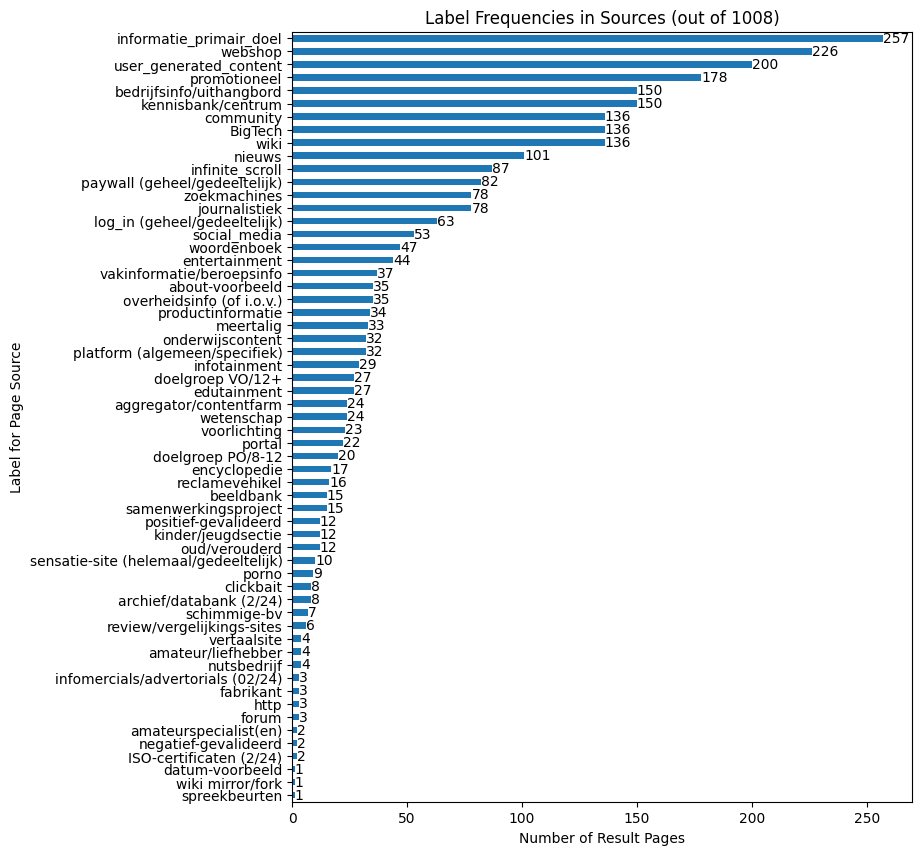

In [187]:
# Same as above on joined data

ax = (
    results_sources["Vrije labels bron/onderwerp"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Label Frequencies in Sources (out of {len(results_sources)})",
        xlabel="Number of Result Pages",
        ylabel="Label for Page Source",
        figsize=(8, 10),
    )
)

ax.bar_label(ax.containers[0])

### Result Sources

[Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0

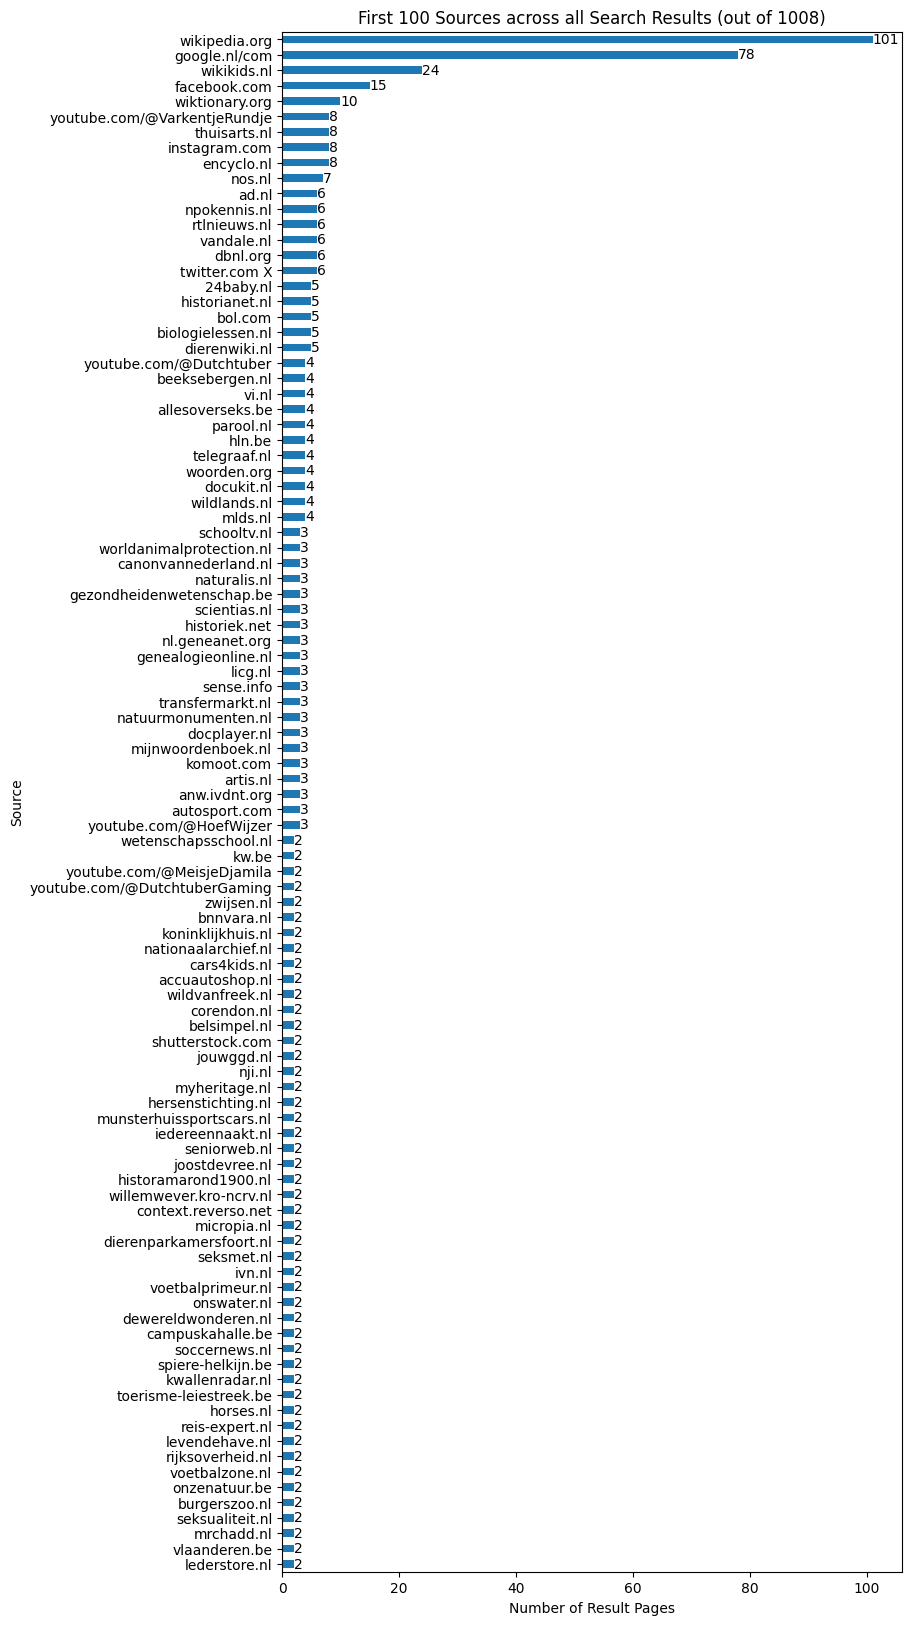

In [151]:
n = 100

ax = (
    results["Bronnen DB"]
    .value_counts()
    .filter(regex="^[^*]")[:n]  # Filter out groups (marked with *)
    .sort_values(ascending=True)
    .plot(
        kind="barh",
        figsize=(8, n // 5),
        title=f"First {n} Sources across all Search Results (out of {len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Source",
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '10'),
 Text(0, 0, '54'),
 Text(0, 0, '85')]

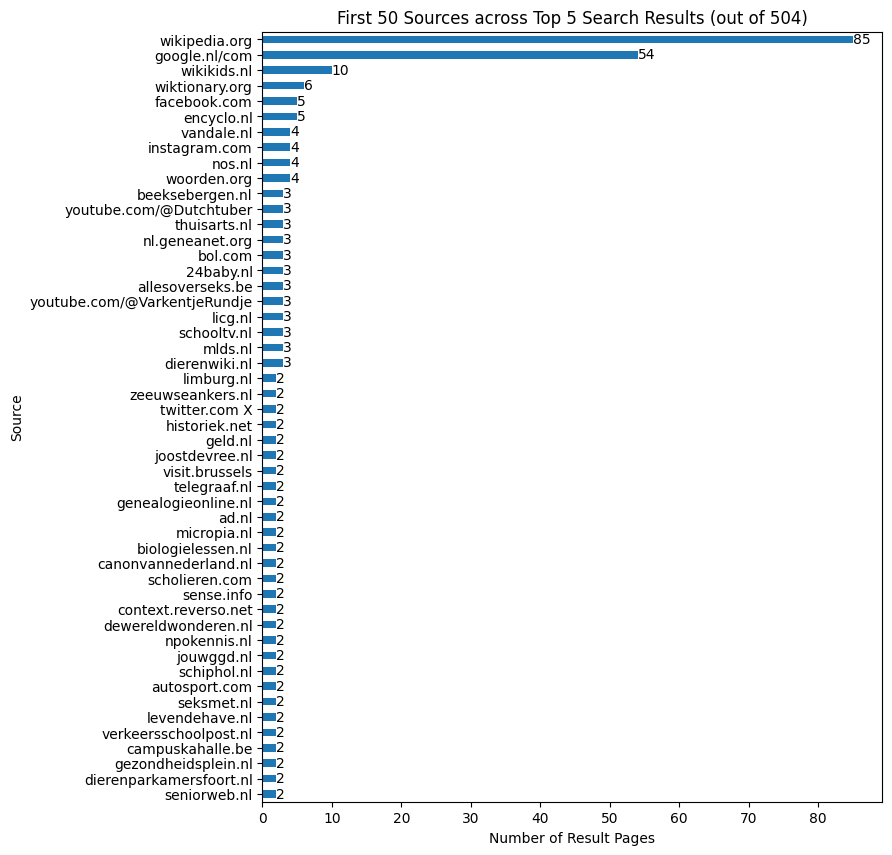

In [152]:
n = 5
_results = results.loc[results["Ranking"] <= n]
k = 50

ax = (
    _results["Bronnen DB"]
    .value_counts()
    .filter(regex="^[^*]")[:k]  # Filter out groups (marked with *)
    .sort_values(ascending=True)
    .plot(
        kind="barh",
        figsize=(8, k // 5),
        title=f"First {k} Sources across Top {n} Search Results (out of {len(_results)})",
        xlabel="Number of Result Pages",
        ylabel="Source",
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '10'),
 Text(0, 0, '38')]

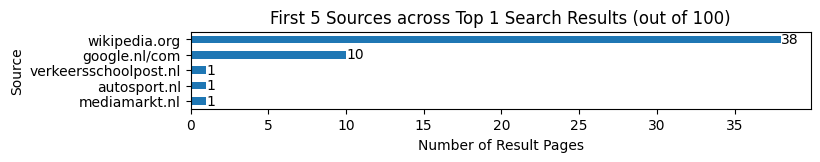

In [153]:
n = 1
_results = results.loc[results["Ranking"] <= n]
k = 5

ax = (
    _results["Bronnen DB"]
    .value_counts()
    .filter(regex="^[^*]")[:k]  # Filter out groups (marked with *)
    .sort_values(ascending=True)
    .plot(
        kind="barh",
        figsize=(8, k // 5),
        title=f"First {k} Sources across Top {n} Search Results (out of {len(_results)})",
        xlabel="Number of Result Pages",
        ylabel="Source",
    )
)

ax.bar_label(ax.containers[0])

In [154]:
# wikikids.nl results never appears on first rank:

results.loc[(results["Bronnen DB"] == ("wikikids.nl")) & (results["Ranking"] <= 1)]

,Titel resultaat,Link/resultaat,Bron: Thumbs up?,Query,Ranking,Bronnen DB,Bron: Inst/Bedrijf,Toegankelijkheid doelgroep (indruk),Relevant?,vrije tags page,...,Opmerking,OnderzoekNr,Bron: Commerciality,Created by,Bron-Status,Bron: Vrije labels,Bron: Sector,Ranking vrije labels,Bron: doel,Related to Bronnen DB test (Resultaten DB)


### Result Types (Informativeness)

[Text(0, 0, '142'), Text(0, 0, '169'), Text(0, 0, '697')]

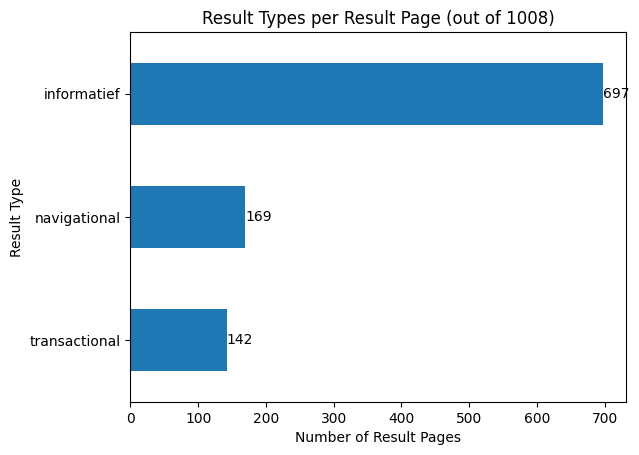

In [155]:
ax = (
    results["Soort Resultaat"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Result Types per Result Page (out of {len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Result Type",
    )
)
ax.bar_label(ax.containers[0])

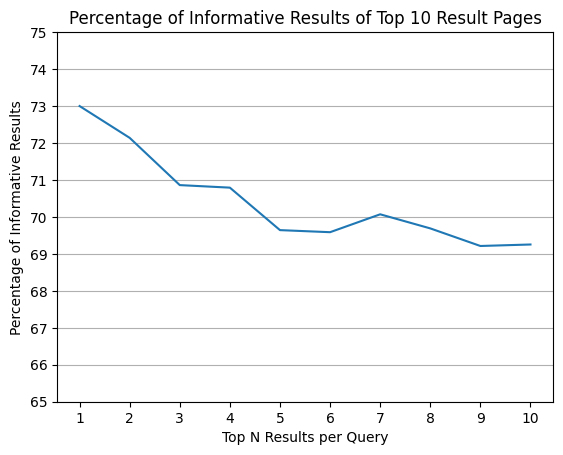

In [156]:
informative: dict[int, float] = {}
for n in range(1, 11):
    informative[n] = (
        results.loc[results["Ranking"] <= n]["Soort Resultaat"].value_counts(
            normalize=True
        )["informatief"]
        * 100
    )

pd.DataFrame(
    informative.items(), columns=["Top N", "Percentage of Informative Results"]
).set_index("Top N").plot(
    title=f"Percentage of Informative Results of Top {n} Result Pages",
    xlabel="Top N Results per Query",
    ylabel="Percentage of Informative Results",
    yticks=range(65, 76, 1),
    xticks=range(1, 11),
    legend=False,
).grid(axis="y")

### Result Relevance

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '12'),
 Text(0, 0, '122'),
 Text(0, 0, '841')]

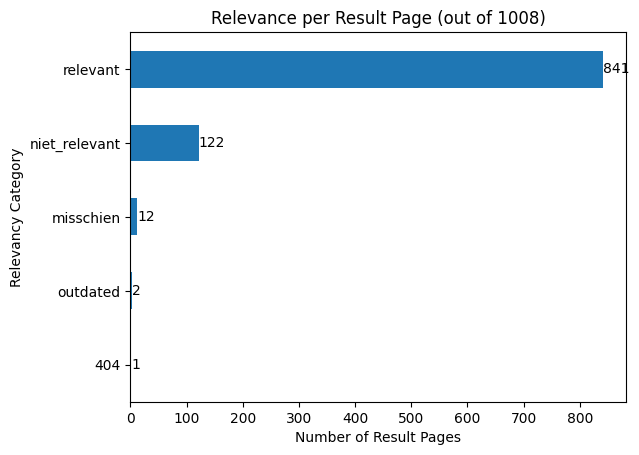

In [157]:
ax = (
    results["Relevant?"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Relevance per Result Page (out of {len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Relevancy Category",
    )
)
ax.bar_label(ax.containers[0])

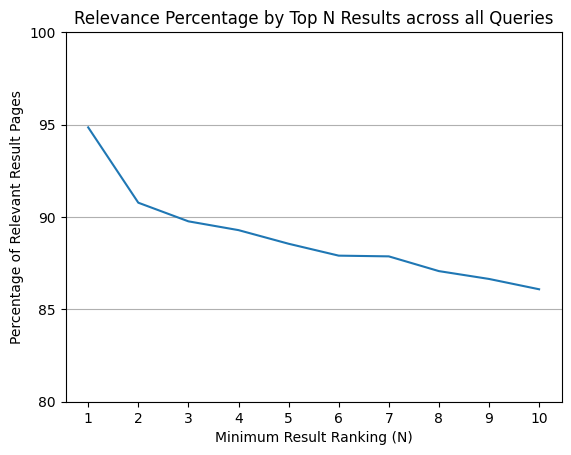

In [158]:
relevant: dict[int, float] = {}

for n in range(1, 11):
    _results = results.loc[results["Ranking"] <= n]
    relevant[n] = _results["Relevant?"].value_counts(normalize=True)["relevant"] * 100

pd.DataFrame(relevant.items(), columns=["Ranking", "Relevance"]).set_index(
    "Ranking"
).plot(
    title="Relevance Percentage by Top N Results across all Queries",
    xlabel="Minimum Result Ranking (N)",
    ylabel="Percentage of Relevant Result Pages",
    xticks=range(1, 11),
    yticks=range(80, 105, 5),
    legend=False,
).grid(axis="y")

### Result Accessibility

[Text(0, 0, '1'),
 Text(0, 0, '8'),
 Text(0, 0, '10'),
 Text(0, 0, '63'),
 Text(0, 0, '294'),
 Text(0, 0, '300'),
 Text(0, 0, '332')]

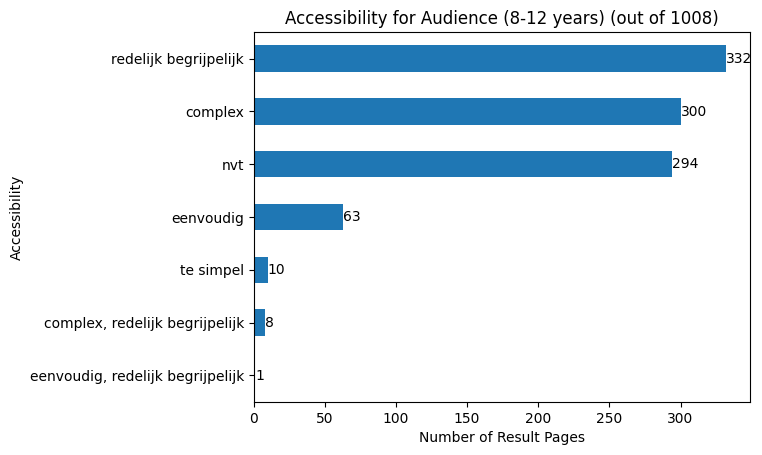

In [159]:
ax = (
    results["Toegankelijkheid doelgroep (indruk)"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Accessibility for Audience (8-12 years) (out of {len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Accessibility",
    )
)
ax.bar_label(ax.containers[0])

### Results Commerciality

[Text(0, 0, '55'),
 Text(0, 0, '20'),
 Text(0, 0, '1'),
 Text(0, 0, '4'),
 Text(0, 0, '353'),
 Text(0, 0, '55'),
 Text(0, 0, '64'),
 Text(0, 0, '407'),
 Text(0, 0, '131')]

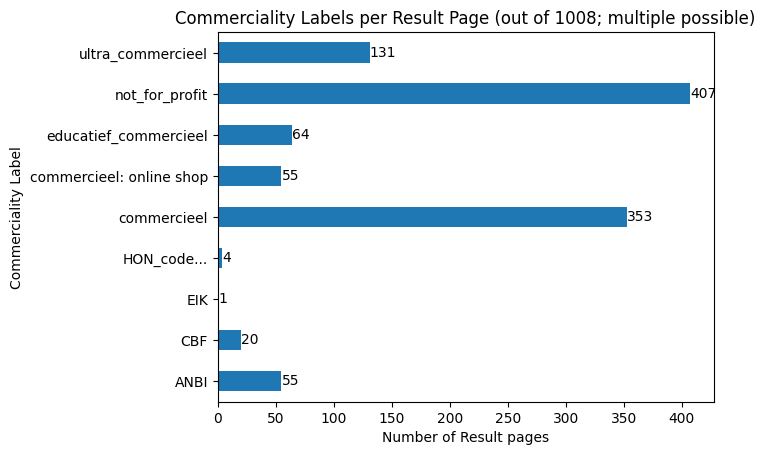

In [184]:
ax = (
    results_sources["Commercialiteit"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts()
    .sort_index()
    .plot(
        kind="barh",
        title=f"Commerciality Labels per Result Page (out of {len(results_sources)}; multiple possible)",
        xlabel="Number of Result pages",
        ylabel="Commerciality Label",
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '24'),
 Text(0, 0, '13'),
 Text(0, 0, '3'),
 Text(0, 0, '146'),
 Text(0, 0, '28'),
 Text(0, 0, '31'),
 Text(0, 0, '228'),
 Text(0, 0, '72')]

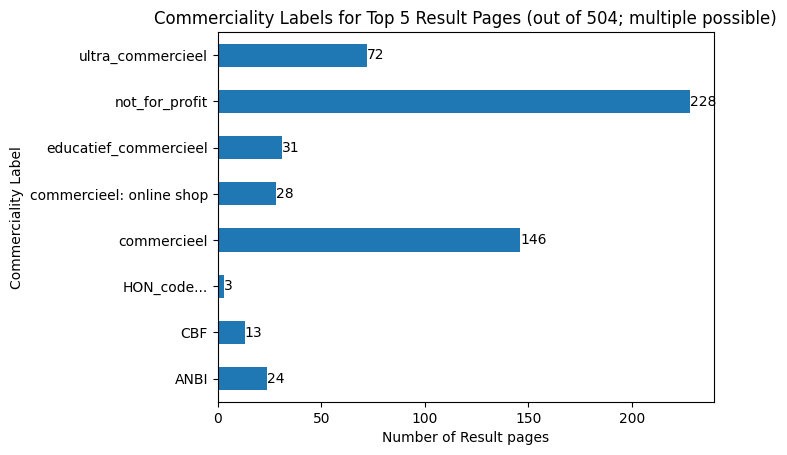

In [185]:
n = 5
_results = results_sources.loc[results["Ranking"] <= n]

ax = (
    _results["Commercialiteit"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts()
    .sort_index()
    .plot(
        kind="barh",
        title=f"Commerciality Labels for Top {n} Result Pages (out of {len(_results)}; multiple possible)",
        xlabel="Number of Result pages",
        ylabel="Commerciality Label",
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '5'),
 Text(0, 0, '3'),
 Text(0, 0, '19'),
 Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '63'),
 Text(0, 0, '11')]

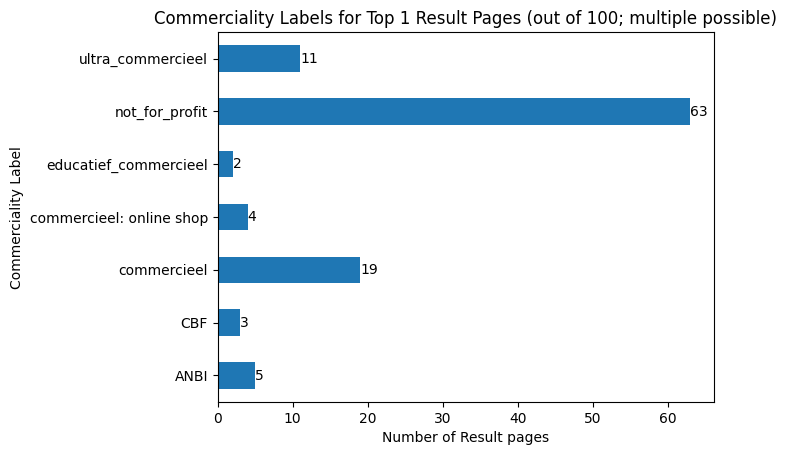

In [186]:
n = 1
_results = results_sources.loc[results["Ranking"] <= n]

ax = (
    _results["Commercialiteit"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts()
    .sort_index()
    .plot(
        kind="barh",
        title=f"Commerciality Labels for Top {n} Result Pages (out of {len(_results)}; multiple possible)",
        xlabel="Number of Result pages",
        ylabel="Commerciality Label",
    )
)
ax.bar_label(ax.containers[0])

### Result Sectors

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '15'),
 Text(0, 0, '18'),
 Text(0, 0, '18'),
 Text(0, 0, '21'),
 Text(0, 0, '25'),
 Text(0, 0, '25'),
 Text(0, 0, '33'),
 Text(0, 0, '35'),
 Text(0, 0, '37'),
 Text(0, 0, '46'),
 Text(0, 0, '68'),
 Text(0, 0, '75'),
 Text(0, 0, '142'),
 Text(0, 0, '166'),
 Text(0, 0, '205')]

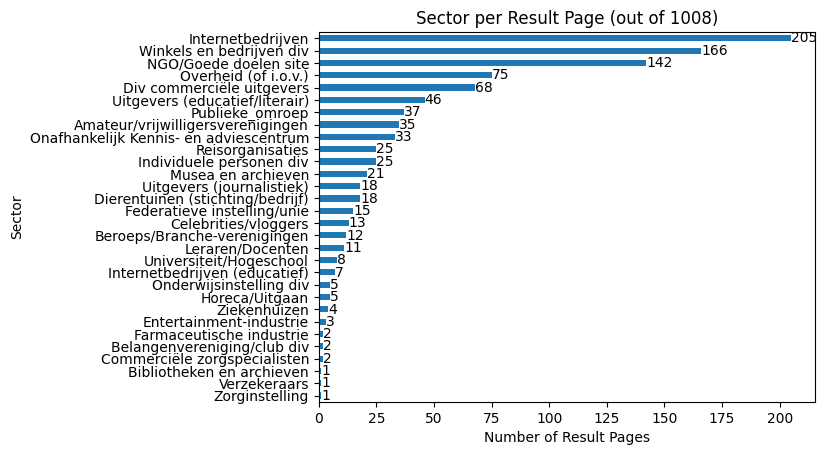

In [193]:
ax = (
    results_sources["Sector"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Sector per Result Page (out of {len(results_sources)})",
        xlabel="Number of Result Pages",
        ylabel="Sector",
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '9'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '12'),
 Text(0, 0, '16'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '24'),
 Text(0, 0, '26'),
 Text(0, 0, '31'),
 Text(0, 0, '72'),
 Text(0, 0, '105'),
 Text(0, 0, '108')]

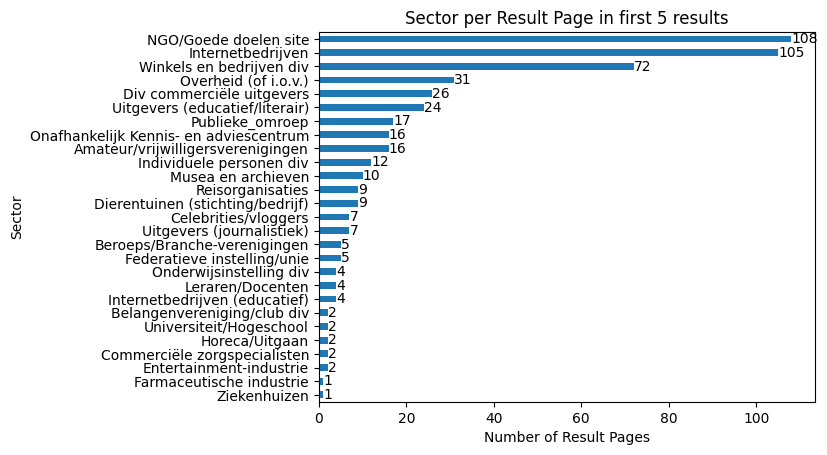

In [195]:
n = 5
ax = (
    results_sources.loc[results_sources["Ranking"] <= n]["Sector"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Sector per Result Page in first {n} results",
        xlabel="Number of Result Pages",
        ylabel="Sector",
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '7'),
 Text(0, 0, '11'),
 Text(0, 0, '15'),
 Text(0, 0, '42')]

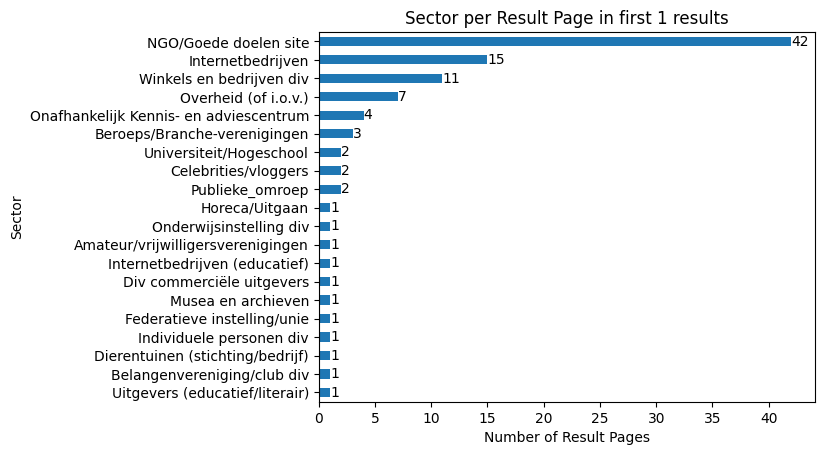

In [196]:
n = 1
ax = (
    results_sources.loc[results_sources["Ranking"] <= n]["Sector"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Sector per Result Page in first {n} results",
        xlabel="Number of Result Pages",
        ylabel="Sector",
    )
)
ax.bar_label(ax.containers[0])

### Thumbs-Up

<Axes: title={'center': 'Thumbs up 8-14? per Result Page (out of 1008)'}, xlabel='Number of Result Pages', ylabel='Thumbs up 8-14?'>

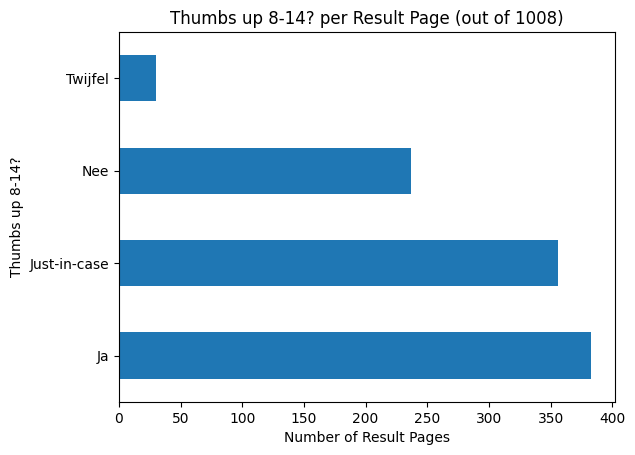

In [199]:
column = "Thumbs up 8-14?"

results_sources[column].str.split(",").explode().str.strip().value_counts(
    sort=False
).plot(
    kind="barh",
    title=f"{column} per Result Page (out of {len(results_sources)})",
    xlabel="Number of Result Pages",
    ylabel=column,
)

<Axes: title={'center': 'Thumbs up 8-14? per Result Page in first 5 results'}, xlabel='Number of Result Pages', ylabel='Thumbs up 8-14?'>

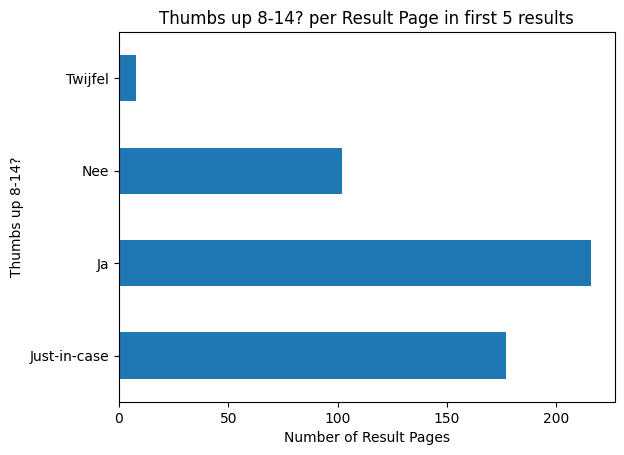

In [200]:
column = "Thumbs up 8-14?"
n = 5

results_sources.loc[results_sources["Ranking"] <= n][column].str.split(
    ","
).explode().str.strip().value_counts(sort=False).plot(
    kind="barh",
    title=f"{column} per Result Page in first {n} results",
    xlabel="Number of Result Pages",
    ylabel=column,
)

<Axes: title={'center': 'Thumbs up 8-14? per Result Page in first 1 results'}, xlabel='Number of Result Pages', ylabel='Thumbs up 8-14?'>

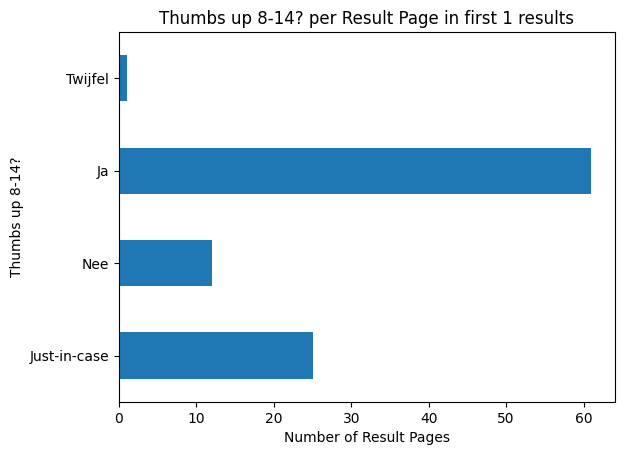

In [201]:
column = "Thumbs up 8-14?"
n = 1

results_sources.loc[results_sources["Ranking"] <= n][column].str.split(
    ","
).explode().str.strip().value_counts(sort=False).plot(
    kind="barh",
    title=f"{column} per Result Page in first {n} results",
    xlabel="Number of Result Pages",
    ylabel=column,
)

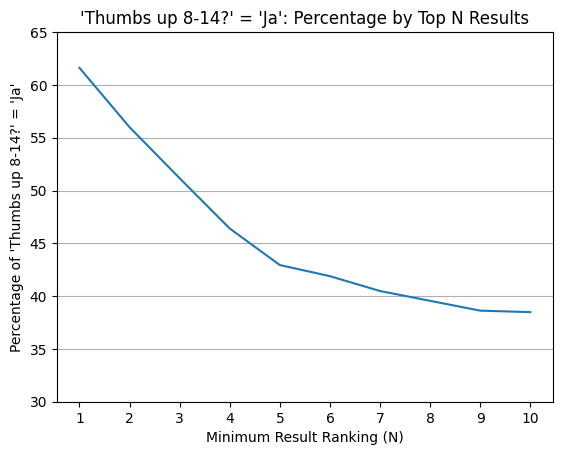

In [216]:
counts: dict[int, float] = {}
category = "Ja"
column = "Thumbs up 8-14?"

for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)[category]
        * 100
    )

pd.DataFrame(counts.items(), columns=["Ranking", "Thumbs Up"]).set_index(
    "Ranking"
).plot(
    title=f"'{column}' = '{category}': Percentage by Top N Results",
    xlabel="Minimum Result Ranking (N)",
    ylabel=f"Percentage of '{column}' = '{category}'",
    xticks=range(1, 11),
    yticks=range(30, 70, 5),
    legend=False,
).grid(axis="y")

### Goal

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '12'),
 Text(0, 0, '14'),
 Text(0, 0, '14'),
 Text(0, 0, '14'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '18'),
 Text(0, 0, '20'),
 Text(0, 0, '20'),
 Text(0, 0, '25'),
 Text(0, 0, '26'),
 Text(0, 0, '26'),
 Text(0, 0, '29'),
 Text(0, 0, '29'),
 Text(0, 0, '29'),
 Text(0, 0, '39'),
 Text(0, 0, '40'),
 Text(0, 0, '47'),
 Text(0, 0, '57'),
 Text(0, 0, '60'),
 Text(0, 0, '65'),
 Text(0, 0, '85'),
 Text(0, 0, '104'),
 Text(0, 0, '113'),
 Text(0, 0, '247')]

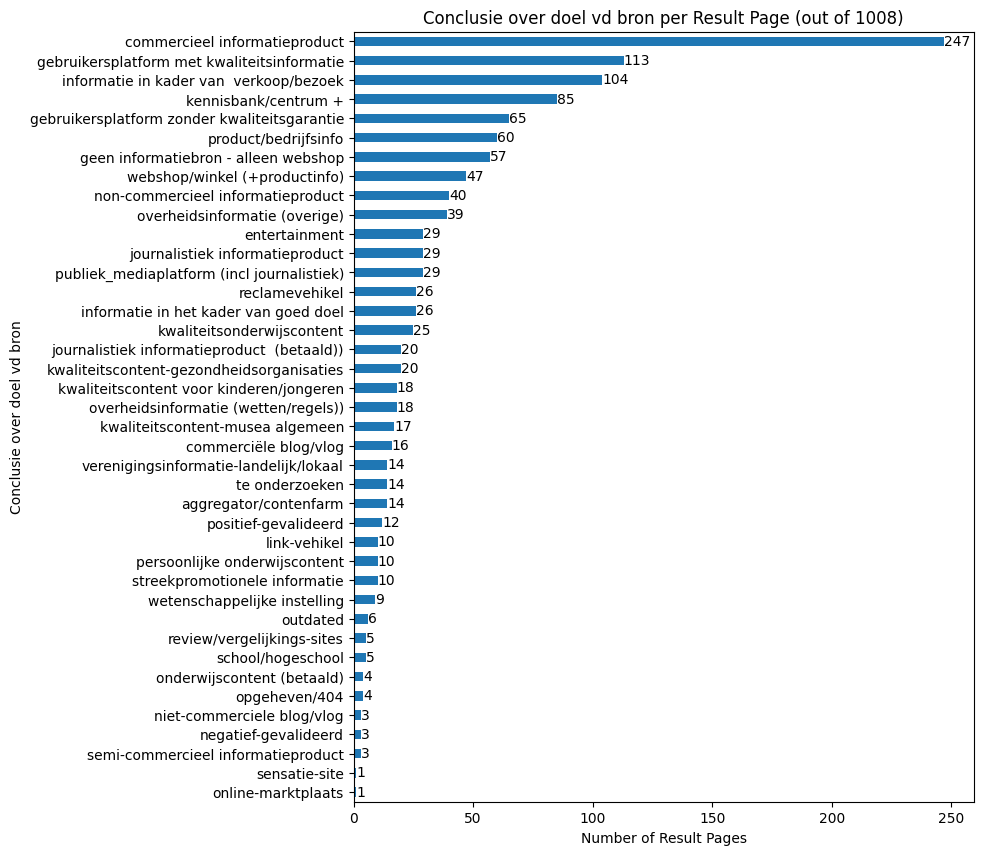

In [207]:
column = "Conclusie over doel vd bron"

ax = (
    results_sources[column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per Result Page (out of {len(results_sources)})",
        xlabel="Number of Result Pages",
        ylabel=column,
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '19'),
 Text(0, 0, '21'),
 Text(0, 0, '25'),
 Text(0, 0, '26'),
 Text(0, 0, '31'),
 Text(0, 0, '35'),
 Text(0, 0, '45'),
 Text(0, 0, '91'),
 Text(0, 0, '121')]

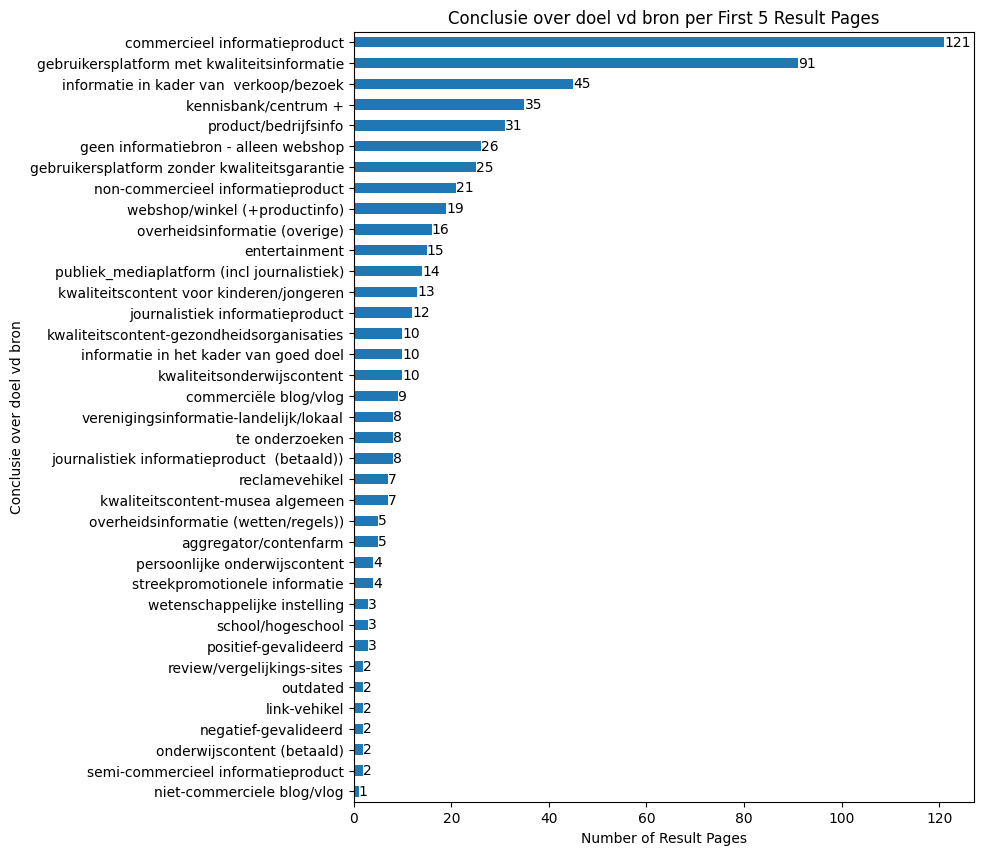

In [208]:
column = "Conclusie over doel vd bron"
n = 5

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per First {n} Result Pages",
        xlabel="Number of Result Pages",
        ylabel=column,
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '8'),
 Text(0, 0, '17'),
 Text(0, 0, '38')]

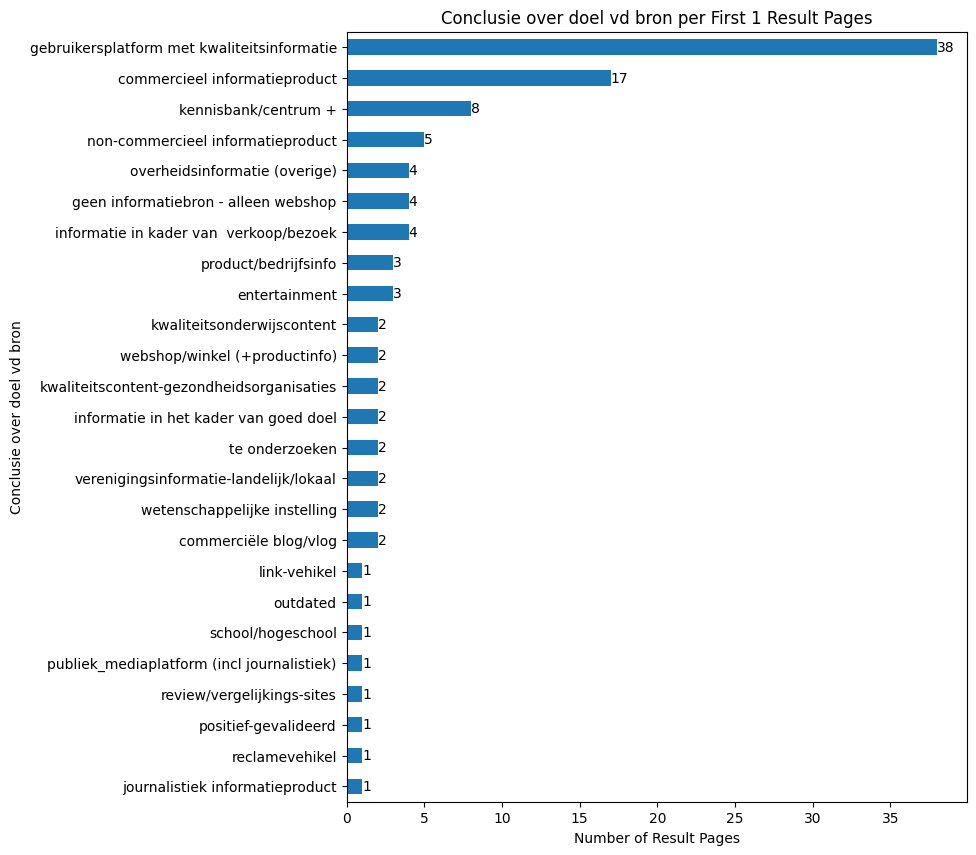

In [218]:
column = "Conclusie over doel vd bron"
n = 1

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per First {n} Result Pages",
        xlabel="Number of Result Pages",
        ylabel=column,
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

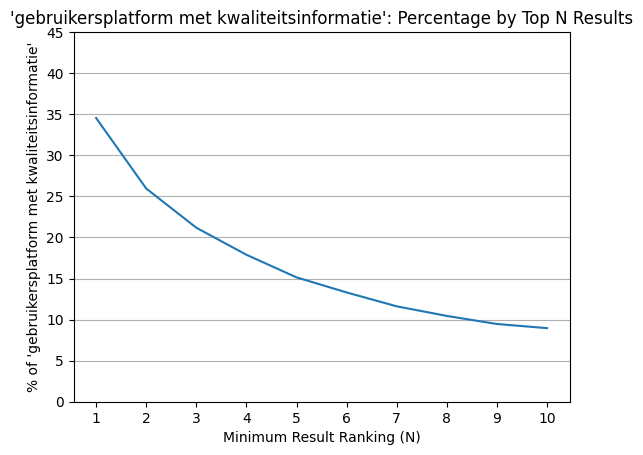

In [223]:
counts: dict[int, float] = {}
category = "gebruikersplatform met kwaliteitsinformatie"

for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)[category]
        * 100
    )

pd.DataFrame(counts.items(), columns=["Ranking", "Thumbs Up"]).set_index(
    "Ranking"
).plot(
    title=f"'{category}': Percentage by Top N Results",
    xlabel="Minimum Result Ranking (N)",
    ylabel=f"% of '{category}'",
    xticks=range(1, 11),
    yticks=range(0, 50, 5),
    legend=False,
).grid(axis="y")

### About Page

[Text(0, 0, '1'),
 Text(0, 0, '21'),
 Text(0, 0, '32'),
 Text(0, 0, '53'),
 Text(0, 0, '130'),
 Text(0, 0, '329'),
 Text(0, 0, '424')]

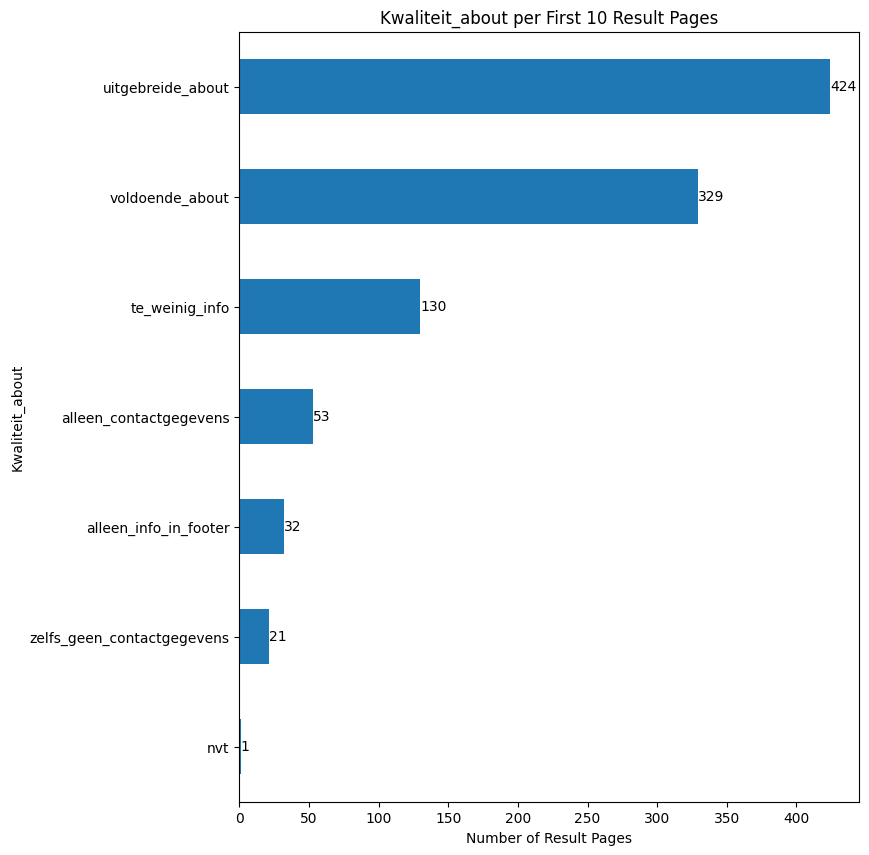

In [233]:
column = "Kwaliteit_about"
n = 10

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per First {n} Result Pages",
        xlabel="Number of Result Pages",
        ylabel=column,
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

In [239]:
### Ads

[Text(0, 0, '8'),
 Text(0, 0, '24'),
 Text(0, 0, '25'),
 Text(0, 0, '40'),
 Text(0, 0, '78'),
 Text(0, 0, '197'),
 Text(0, 0, '354'),
 Text(0, 0, '384')]

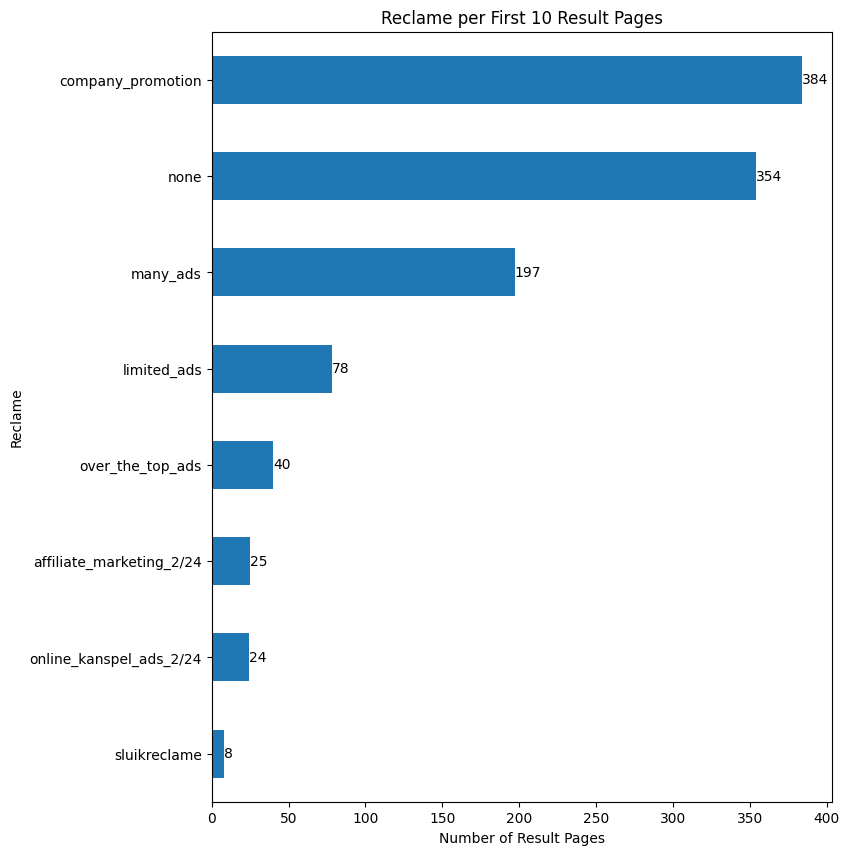

In [235]:
column = "Reclame"
n = 10

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per First {n} Result Pages",
        xlabel="Number of Result Pages",
        ylabel=column,
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '2'),
 Text(0, 0, '9'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '33'),
 Text(0, 0, '115'),
 Text(0, 0, '169'),
 Text(0, 0, '198')]

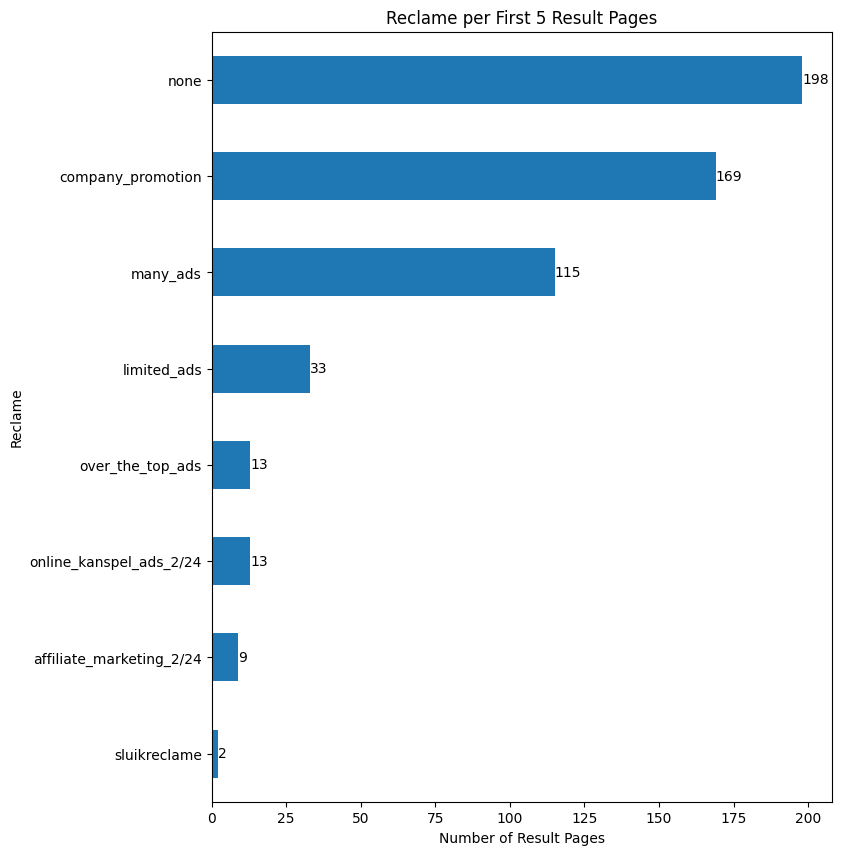

In [236]:
column = "Reclame"
n = 5

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per First {n} Result Pages",
        xlabel="Number of Result Pages",
        ylabel=column,
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '5'),
 Text(0, 0, '15'),
 Text(0, 0, '21'),
 Text(0, 0, '59')]

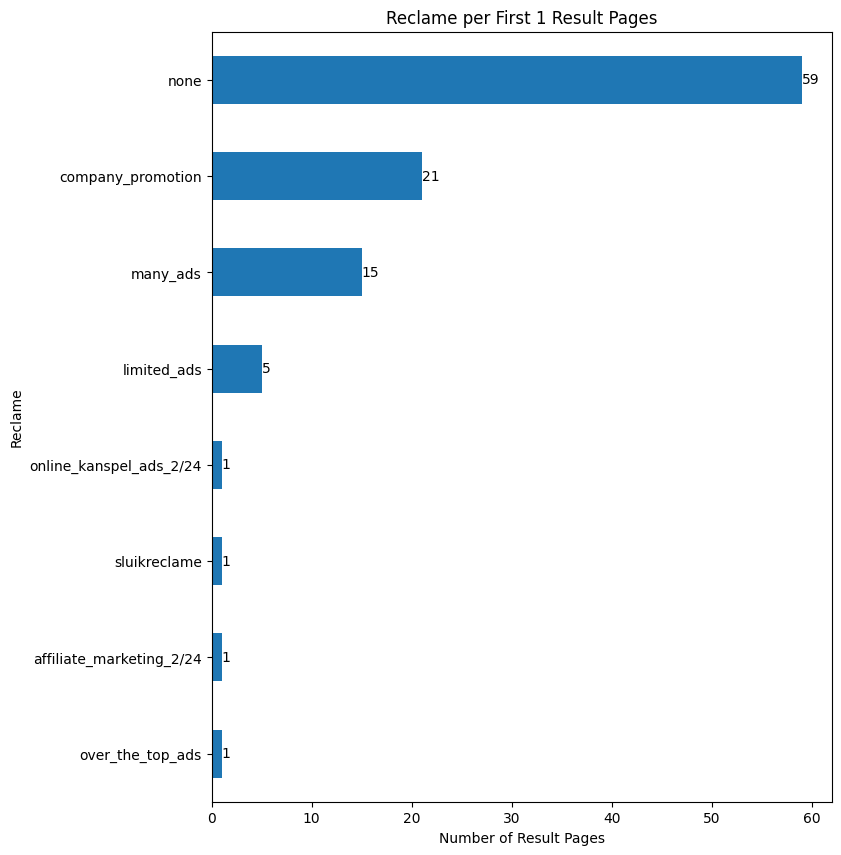

In [237]:
column = "Reclame"
n = 1

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per First {n} Result Pages",
        xlabel="Number of Result Pages",
        ylabel=column,
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

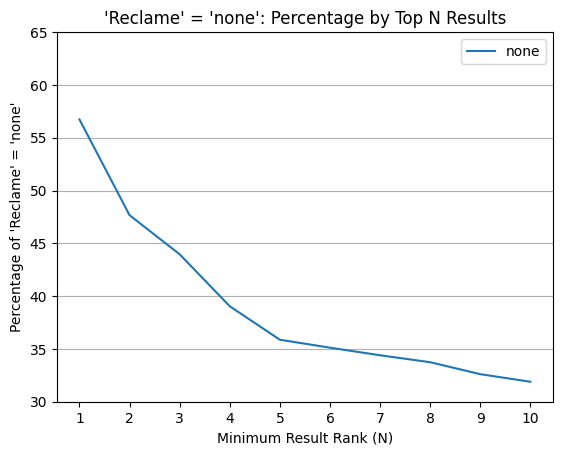

In [263]:
counts: dict[int, float] = {}
category = "none"

for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)[category]
        * 100
    )

pd.DataFrame(counts.items(), columns=["Ranking", category]).set_index("Ranking").plot(
    title=f"'{column}' = '{category}': Percentage by Top N Results",
    xlabel="Minimum Result Rank (N)",
    ylabel=f"Percentage of '{column}' = '{category}'",
    xticks=range(1, 11),
    yticks=range(30, 70, 5),
    legend=True,
).grid(axis="y")

## Sources

### Commerciality

[Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '13'),
 Text(0, 0, '18'),
 Text(0, 0, '33'),
 Text(0, 0, '41'),
 Text(0, 0, '48'),
 Text(0, 0, '189'),
 Text(0, 0, '258')]

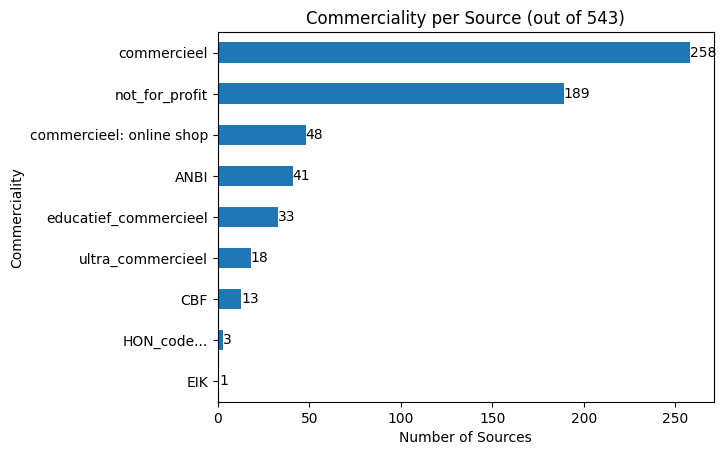

In [163]:
ax = (
    sources["Commercialiteit"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Commerciality per Source (out of {len(sources)})",
        xlabel="Number of Sources",
        ylabel="Commerciality",
    )
)
ax.bar_label(ax.containers[0])

### Sectors

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '10'),
 Text(0, 0, '13'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '17'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '23'),
 Text(0, 0, '32'),
 Text(0, 0, '34'),
 Text(0, 0, '55'),
 Text(0, 0, '74'),
 Text(0, 0, '145')]

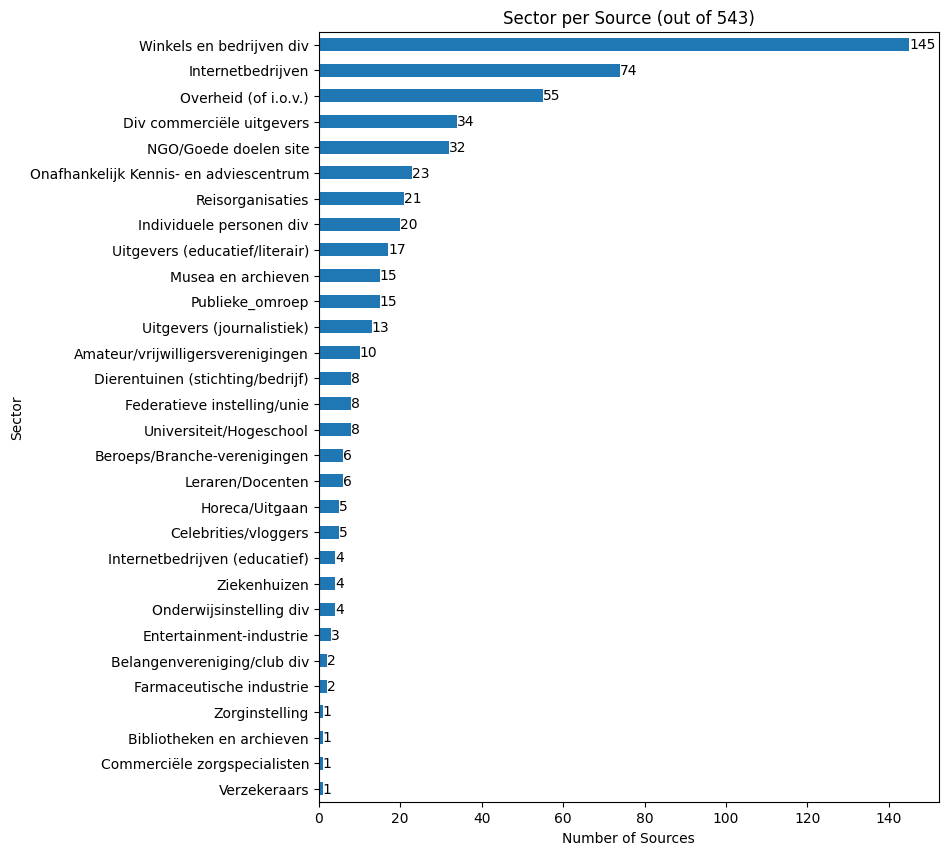

In [164]:
ax = (
    sources["Sector"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Sector per Source (out of {len(sources)})",
        xlabel="Number of Sources",
        ylabel="Sector",
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

### Free Labels

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '11'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '17'),
 Text(0, 0, '17'),
 Text(0, 0, '17'),
 Text(0, 0, '19'),
 Text(0, 0, '19'),
 Text(0, 0, '24'),
 Text(0, 0, '26'),
 Text(0, 0, '26'),
 Text(0, 0, '29'),
 Text(0, 0, '29'),
 Text(0, 0, '33'),
 Text(0, 0, '40'),
 Text(0, 0, '42'),
 Text(0, 0, '53'),
 

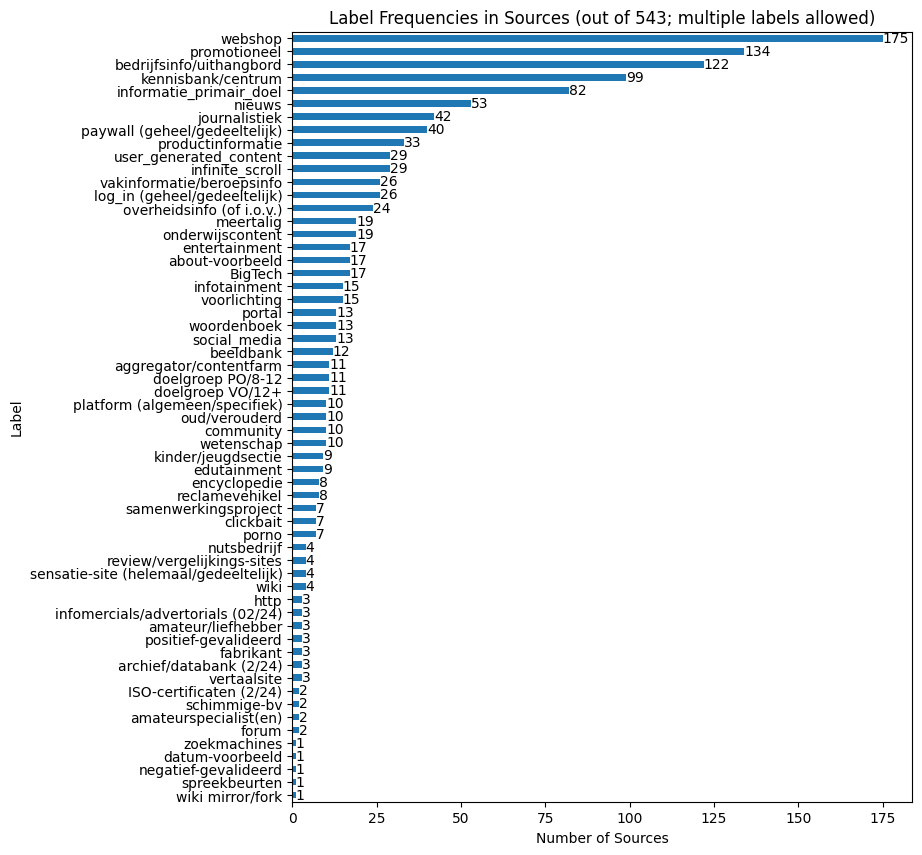

In [165]:
ax = (
    sources["Vrije labels bron/onderwerp"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Label Frequencies in Sources (out of {len(sources)}; multiple labels allowed)",
        xlabel="Number of Sources",
        ylabel="Label",
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

### Trackers

<Axes: title={'center': 'Number of Blocked Trackers per Source (out of 543)'}, xlabel='Number of Sources', ylabel='Number of Blocked Trackers'>

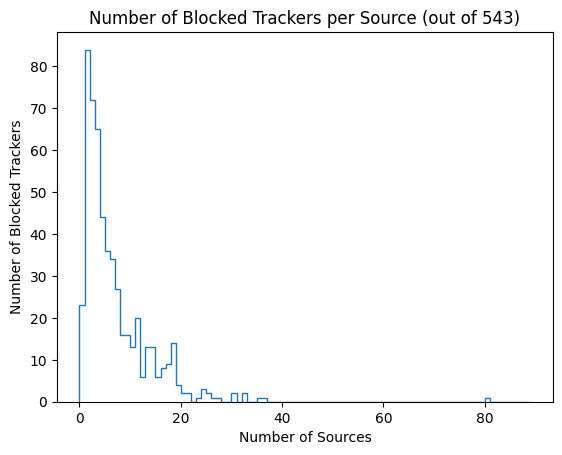

In [166]:
sources["uBlocked trackers"].plot(
    kind="hist",
    histtype="step",
    bins=range(0, 90),
    title=f"Number of Blocked Trackers per Source (out of {len(sources)})",
    ylabel="Number of Blocked Trackers",
    xlabel="Number of Sources",
)

### Ads

[Text(0, 0, '17'),
 Text(0, 0, '288'),
 Text(0, 0, '43'),
 Text(0, 0, '58'),
 Text(0, 0, '162'),
 Text(0, 0, '7'),
 Text(0, 0, '20'),
 Text(0, 0, '6')]

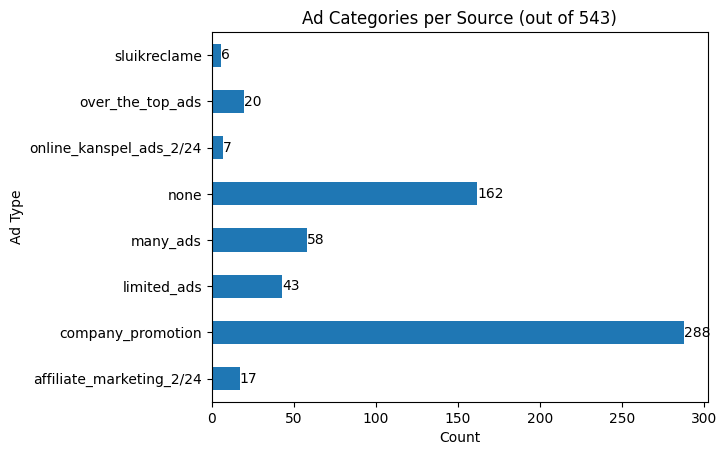

In [167]:
ax = (
    sources["Reclame"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts()
    .sort_index()
    .plot(
        kind="barh",
        title=f"Ad Categories per Source (out of {len(sources)})",
        xlabel="Count",
        ylabel="Ad Type",
    )
)
ax.bar_label(ax.containers[0])

### Goal of Source

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '9'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '14'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '32'),
 Text(0, 0, '42'),
 Text(0, 0, '50'),
 Text(0, 0, '54'),
 Text(0, 0, '59'),
 Text(0, 0, '81'),
 Text(0, 0, '92')]

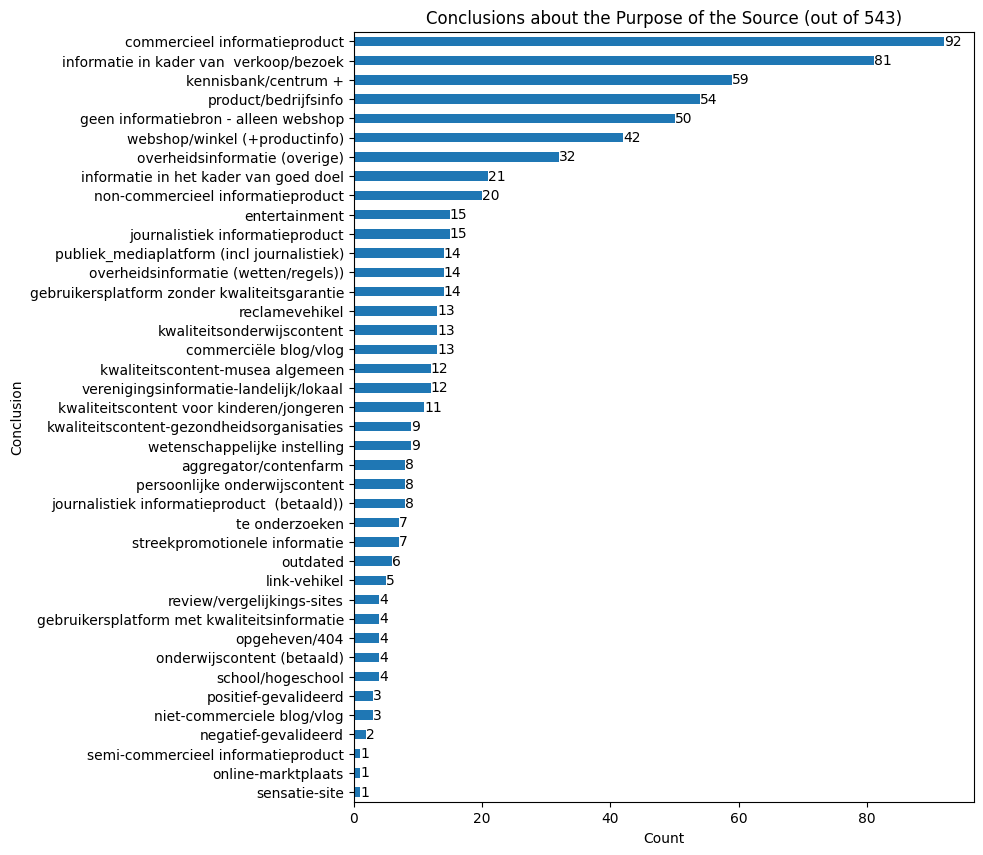

In [168]:
ax = (
    sources["Conclusie over doel vd bron"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Conclusions about the Purpose of the Source (out of {len(sources)})",
        xlabel="Count",
        ylabel="Conclusion",
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

### Source: Thumbs-Up

[Text(0, 0, '21'), Text(0, 0, '167'), Text(0, 0, '177'), Text(0, 0, '178')]

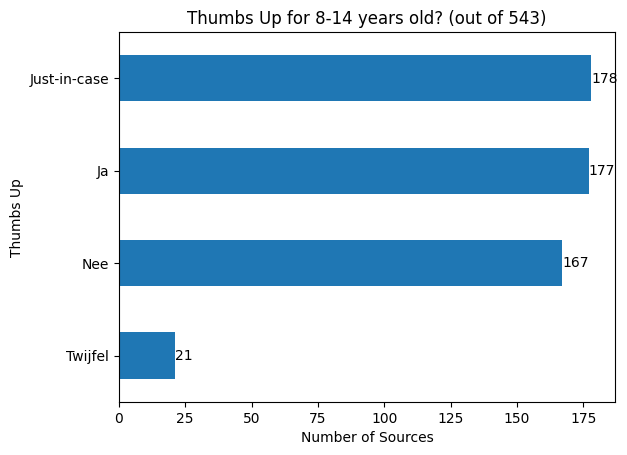

In [169]:
ax = (
    sources["Thumbs up 8-14?"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Thumbs Up for 8-14 years old? (out of {len(sources)})",
        xlabel="Number of Sources",
        ylabel="Thumbs Up",
    )
)
ax.bar_label(ax.containers[0])

### About Page

[Text(0, 0, '1'),
 Text(0, 0, '12'),
 Text(0, 0, '14'),
 Text(0, 0, '35'),
 Text(0, 0, '66'),
 Text(0, 0, '202'),
 Text(0, 0, '213')]

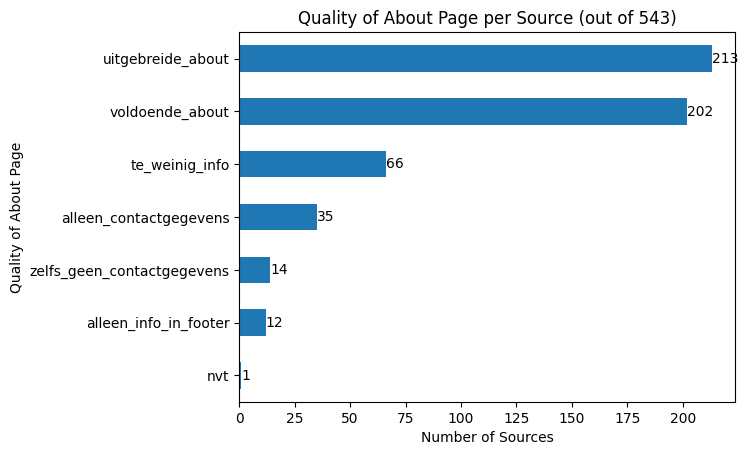

In [170]:
ax = (
    sources["Kwaliteit_about"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Quality of About Page per Source (out of {len(sources)})",
        xlabel="Number of Sources",
        ylabel="Quality of About Page",
    )
)
ax.bar_label(ax.containers[0])

## Queries and Result Pages

### Query Length

[Text(0, 0, '46'),
 Text(0, 0, '26'),
 Text(0, 0, '12'),
 Text(0, 0, '7'),
 Text(0, 0, '2'),
 Text(0, 0, '4'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

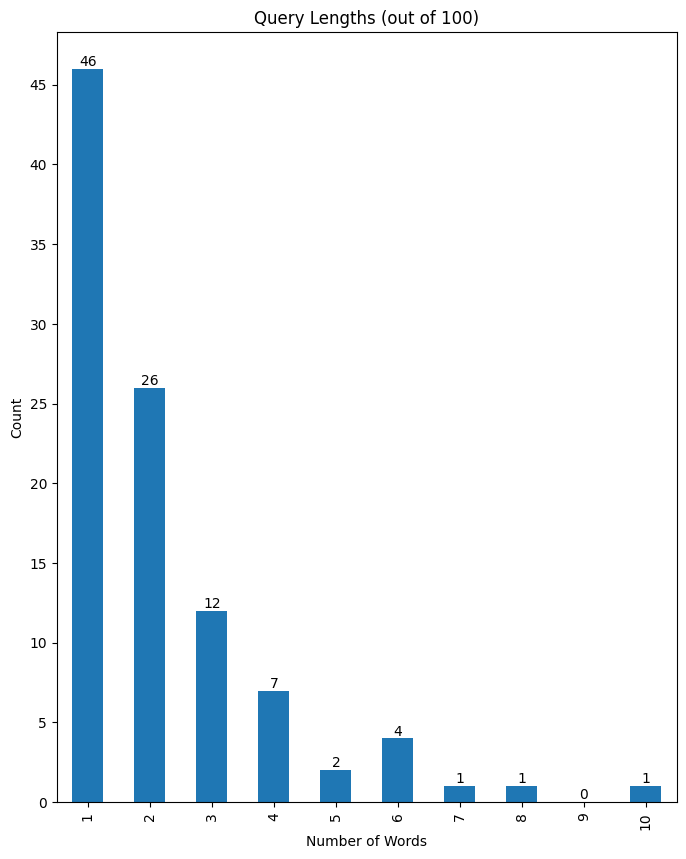

In [171]:
lengths = queries["Query"].str.split(" ").str.len().value_counts()
values = range(1, lengths.index.max() + 1)

ax = lengths.reindex(values, fill_value=0).plot(
    kind="bar",
    title=f"Query Lengths (out of {len(queries)})",
    ylabel="Count",
    xlabel="Number of Words",
    figsize=(8, 10),
    yticks=range(0, 50, 5),
)
ax.bar_label(ax.containers[0])

### Result Page Extras

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '12'),
 Text(0, 0, '15'),
 Text(0, 0, '25'),
 Text(0, 0, '29'),
 Text(0, 0, '67'),
 Text(0, 0, '85')]

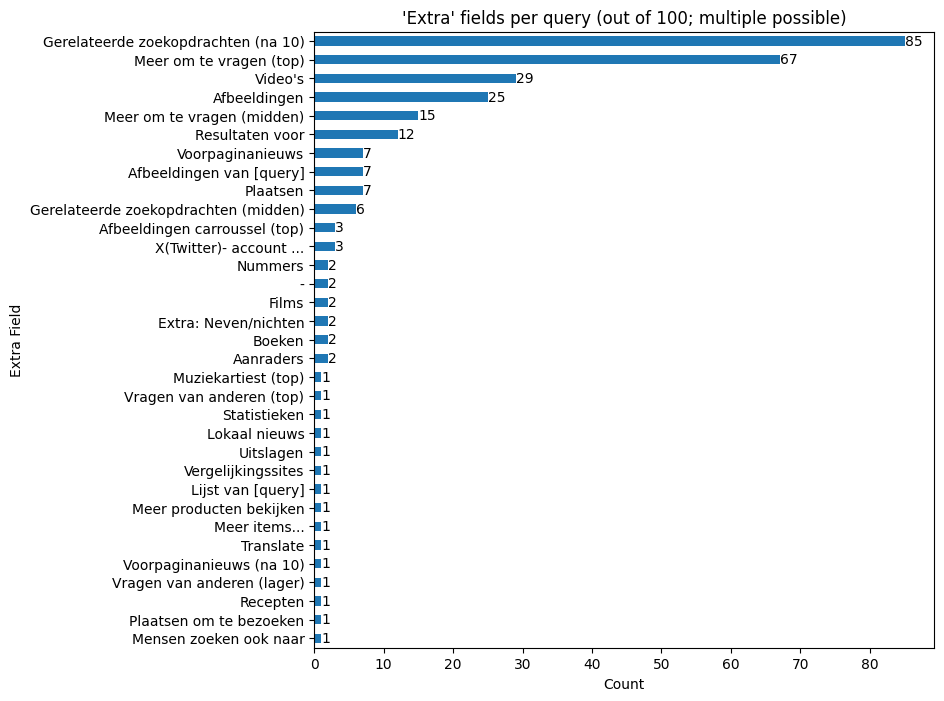

In [172]:
ax = (
    queries["Extra (top-down)"]
    .str.split(", ")
    .explode()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"'Extra' fields per query (out of {len(queries)}; multiple possible)",
        figsize=(8, 8),
        xlabel="Count",
        ylabel="Extra Field",
    )
)
ax.bar_label(ax.containers[0])